<a href="https://colab.research.google.com/github/cyberdreams8/water-quality-analysis-and-prediction-2/blob/main/PDS_waterquality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing the necessary liabraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##Reading the Dataset

In [3]:
Dataset = pd.read_csv("https://raw.githubusercontent.com/cyberdreams8/water-quality-analysis-and-prediction-2/refs/heads/main/water_quality_dataset.csv")
Dataset

,Unnamed: 0,Station Code,Station Name,STATE,Temperature Min,Temperature Max,pH Min,pH Max,Conductivity (µmhos/cm) Min,Conductivity (µmhos/cm) Max,Year,Turbidity (NTU),Dissolved Oxygen (mg/L),BOD (mg/L),TDS (mg/L),Hardness (mg/L),Potability
0,0,15.0,"WELL AT KUYYURA, A.P.",ANDHRA PRADESH,23.0,28.0,6.82,7.85,195.0,226.0,2012,4.070235,10.134345,0.962008,578.810775,104.950680,Drinkable
1,1,16.0,WELL AT TADAVAI A.P.,ANDHRA PRADESH,27.0,28.0,7.21,7.72,663.0,1121.0,2012,11.564508,10.595564,7.927889,529.066337,205.746813,Not Drinkable
2,2,26.0,"WELL AT VIJAYWADA, A.P.",ANDHRA PRADESH,26.0,32.0,7.19,7.39,1601.0,1661.0,2012,14.543769,10.297229,1.070086,920.225147,217.964732,Not Drinkable
3,3,27.0,"WELL AT PEDDAVOORA, A.P.",ANDHRA PRADESH,26.0,27.0,7.82,8.80,1420.0,1668.0,2012,11.564508,10.297229,6.486625,1198.784496,182.125474,Not Drinkable
4,4,1513.0,"B W. - KRISHNA MURTHY, D.NO. 48-16-43 AUTONAGA...",ANDHRA PRADESH,25.0,30.0,6.80,7.11,1454.0,1575.0,2012,10.979909,3.262711,6.434438,1043.741646,123.066151,Not Drinkable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6311,983,2533.0,SURI TOWN NEAR BUS STAND,WEST BENGAL,27.0,30.0,7.20,7.90,358.0,651.0,2021,7.840992,8.334117,6.326797,723.104180,472.638138,Not Drinkable
6312,984,1773.0,"TANGRA, CALCUTTA , WEST\nBENGAL",WEST BENGAL,28.0,31.0,7.30,7.40,1435.0,1730.0,2021,4.675666,NaN,5.193830,230.164378,234.763384,Not Drinkable
6313,985,1774.0,"TOPSIA CALCUTTA, WEST\nBENGAL",WEST BENGAL,29.0,31.0,7.30,7.30,1705.0,1921.0,2021,6.479175,5.978842,6.091671,920.225147,123.066151,Not Drinkable
6314,986,2546.0,ULUBERIA COLLEGE AT HOWRAH,WEST BENGAL,26.0,30.0,7.20,7.60,909.0,1090.0,2021,1.465082,8.737017,6.525324,480.030896,373.339982,Not Drinkable


In [4]:
Dataset.columns

Index(['Unnamed: 0', 'Station Code', 'Station Name', 'STATE',
       'Temperature Min', 'Temperature Max', 'pH Min', 'pH Max',
       'Conductivity (µmhos/cm) Min', 'Conductivity (µmhos/cm) Max', 'Year',
       'Turbidity (NTU)', 'Dissolved Oxygen (mg/L)', 'BOD (mg/L)',
       'TDS (mg/L)', 'Hardness (mg/L)', 'Potability'],
      dtype='object')

In [5]:
Dataset

,Unnamed: 0,Station Code,Station Name,STATE,Temperature Min,Temperature Max,pH Min,pH Max,Conductivity (µmhos/cm) Min,Conductivity (µmhos/cm) Max,Year,Turbidity (NTU),Dissolved Oxygen (mg/L),BOD (mg/L),TDS (mg/L),Hardness (mg/L),Potability
0,0,15.0,"WELL AT KUYYURA, A.P.",ANDHRA PRADESH,23.0,28.0,6.82,7.85,195.0,226.0,2012,4.070235,10.134345,0.962008,578.810775,104.950680,Drinkable
1,1,16.0,WELL AT TADAVAI A.P.,ANDHRA PRADESH,27.0,28.0,7.21,7.72,663.0,1121.0,2012,11.564508,10.595564,7.927889,529.066337,205.746813,Not Drinkable
2,2,26.0,"WELL AT VIJAYWADA, A.P.",ANDHRA PRADESH,26.0,32.0,7.19,7.39,1601.0,1661.0,2012,14.543769,10.297229,1.070086,920.225147,217.964732,Not Drinkable
3,3,27.0,"WELL AT PEDDAVOORA, A.P.",ANDHRA PRADESH,26.0,27.0,7.82,8.80,1420.0,1668.0,2012,11.564508,10.297229,6.486625,1198.784496,182.125474,Not Drinkable
4,4,1513.0,"B W. - KRISHNA MURTHY, D.NO. 48-16-43 AUTONAGA...",ANDHRA PRADESH,25.0,30.0,6.80,7.11,1454.0,1575.0,2012,10.979909,3.262711,6.434438,1043.741646,123.066151,Not Drinkable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6311,983,2533.0,SURI TOWN NEAR BUS STAND,WEST BENGAL,27.0,30.0,7.20,7.90,358.0,651.0,2021,7.840992,8.334117,6.326797,723.104180,472.638138,Not Drinkable
6312,984,1773.0,"TANGRA, CALCUTTA , WEST\nBENGAL",WEST BENGAL,28.0,31.0,7.30,7.40,1435.0,1730.0,2021,4.675666,NaN,5.193830,230.164378,234.763384,Not Drinkable
6313,985,1774.0,"TOPSIA CALCUTTA, WEST\nBENGAL",WEST BENGAL,29.0,31.0,7.30,7.30,1705.0,1921.0,2021,6.479175,5.978842,6.091671,920.225147,123.066151,Not Drinkable
6314,986,2546.0,ULUBERIA COLLEGE AT HOWRAH,WEST BENGAL,26.0,30.0,7.20,7.60,909.0,1090.0,2021,1.465082,8.737017,6.525324,480.030896,373.339982,Not Drinkable


In [6]:
Dataset.head()

,Unnamed: 0,Station Code,Station Name,STATE,Temperature Min,Temperature Max,pH Min,pH Max,Conductivity (µmhos/cm) Min,Conductivity (µmhos/cm) Max,Year,Turbidity (NTU),Dissolved Oxygen (mg/L),BOD (mg/L),TDS (mg/L),Hardness (mg/L),Potability
0,0,15.0,"WELL AT KUYYURA, A.P.",ANDHRA PRADESH,23.0,28.0,6.82,7.85,195.0,226.0,2012,4.070235,10.134345,0.962008,578.810775,104.950680,Drinkable
1,1,16.0,WELL AT TADAVAI A.P.,ANDHRA PRADESH,27.0,28.0,7.21,7.72,663.0,1121.0,2012,11.564508,10.595564,7.927889,529.066337,205.746813,Not Drinkable
2,2,26.0,"WELL AT VIJAYWADA, A.P.",ANDHRA PRADESH,26.0,32.0,7.19,7.39,1601.0,1661.0,2012,14.543769,10.297229,1.070086,920.225147,217.964732,Not Drinkable
3,3,27.0,"WELL AT PEDDAVOORA, A.P.",ANDHRA PRADESH,26.0,27.0,7.82,8.80,1420.0,1668.0,2012,11.564508,10.297229,6.486625,1198.784496,182.125474,Not Drinkable
4,4,1513.0,"B W. - KRISHNA MURTHY, D.NO. 48-16-43 AUTONAGA...",ANDHRA PRADESH,25.0,30.0,6.80,7.11,1454.0,1575.0,2012,10.979909,3.262711,6.434438,1043.741646,123.066151,Not Drinkable


In [7]:
Dataset.tail()

,Unnamed: 0,Station Code,Station Name,STATE,Temperature Min,Temperature Max,pH Min,pH Max,Conductivity (µmhos/cm) Min,Conductivity (µmhos/cm) Max,Year,Turbidity (NTU),Dissolved Oxygen (mg/L),BOD (mg/L),TDS (mg/L),Hardness (mg/L),Potability
6311,983,2533.0,SURI TOWN NEAR BUS STAND,WEST BENGAL,27.0,30.0,7.2,7.9,358.0,651.0,2021,7.840992,8.334117,6.326797,723.104180,472.638138,Not Drinkable
6312,984,1773.0,"TANGRA, CALCUTTA , WEST\nBENGAL",WEST BENGAL,28.0,31.0,7.3,7.4,1435.0,1730.0,2021,4.675666,NaN,5.193830,230.164378,234.763384,Not Drinkable
6313,985,1774.0,"TOPSIA CALCUTTA, WEST\nBENGAL",WEST BENGAL,29.0,31.0,7.3,7.3,1705.0,1921.0,2021,6.479175,5.978842,6.091671,920.225147,123.066151,Not Drinkable
6314,986,2546.0,ULUBERIA COLLEGE AT HOWRAH,WEST BENGAL,26.0,30.0,7.2,7.6,909.0,1090.0,2021,1.465082,8.737017,6.525324,480.030896,373.339982,Not Drinkable
6315,987,2535.0,VISVA BHARATI,WEST BENGAL,30.0,31.0,7.9,8.2,370.0,437.0,2021,0.678409,4.987829,5.729190,578.810775,51.550765,Not Drinkable


##Sanity Check of Data

In [8]:
Dataset.shape

(6316, 17)

In [9]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6316 entries, 0 to 6315
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   6316 non-null   int64  
 1   Station Code                 6240 non-null   float64
 2   Station Name                 6267 non-null   object 
 3   STATE                        6241 non-null   object 
 4   Temperature Min              5818 non-null   float64
 5   Temperature Max              5818 non-null   float64
 6   pH Min                       6195 non-null   float64
 7   pH Max                       6195 non-null   float64
 8   Conductivity (µmhos/cm) Min  6124 non-null   float64
 9   Conductivity (µmhos/cm) Max  6124 non-null   float64
 10  Year                         6316 non-null   int64  
 11  Turbidity (NTU)              6255 non-null   float64
 12  Dissolved Oxygen (mg/L)      6253 non-null   float64
 13  BOD (mg/L)        

In [10]:
#finding missing values
Dataset.isnull().sum()

,0
Unnamed: 0,0
Station Code,76
Station Name,49
STATE,75
Temperature Min,498
Temperature Max,498
pH Min,121
pH Max,121
Conductivity (µmhos/cm) Min,192
Conductivity (µmhos/cm) Max,192


In [11]:
#finding missing values in percentage
Dataset.isnull().sum()/Dataset.shape[0]*100

,0
Unnamed: 0,0.000000
Station Code,1.203293
Station Name,0.775807
STATE,1.187460
Temperature Min,7.884737
Temperature Max,7.884737
pH Min,1.915769
pH Max,1.915769
Conductivity (µmhos/cm) Min,3.039899
Conductivity (µmhos/cm) Max,3.039899


In [12]:
#finding duplicates
Dataset.duplicated().sum()

0

In [13]:
#identifying garbage values
for i in Dataset.select_dtypes(include='object').columns:
  print(Dataset[i].value_counts())
  print("***"*10)

Station Name
BEGUSARAI                                                                                    10
PATNA                                                                                        10
FULBARI BARRAGE                                                                               9
NANGAL, PUNJAB                                                                                9
VISVA BHARATI                                                                                 9
                                                                                             ..
HAND PUMP WATER NEAR D.M OFFICE, MADHEPURA                                                    1
HAND PUMP WATER AT COLLECTRIATE OFFICE, MADHUBANI                                             1
TAP WATER INSIDE THE CAMPUS OF TOURIST CAFETERIA,\nNALANDA                                    1
HAND PUMP WATER AT CIVIL COURT, NALANDA                                                       1
GROUND WATER AT BHAGWAN\nIN

##Exploratory Data Analysis (EDA)

In [14]:
Dataset.columns

Index(['Unnamed: 0', 'Station Code', 'Station Name', 'STATE',
       'Temperature Min', 'Temperature Max', 'pH Min', 'pH Max',
       'Conductivity (µmhos/cm) Min', 'Conductivity (µmhos/cm) Max', 'Year',
       'Turbidity (NTU)', 'Dissolved Oxygen (mg/L)', 'BOD (mg/L)',
       'TDS (mg/L)', 'Hardness (mg/L)', 'Potability'],
      dtype='object')

In [15]:
#descriptive statistics
columns= ['Temperature Min', 'Temperature Max', 'pH Min', 'pH Max',
       'Conductivity (µmhos/cm) Min', 'Conductivity (µmhos/cm) Max',
       'Turbidity (NTU)', 'Dissolved Oxygen (mg/L)', 'BOD (mg/L)',
       'TDS (mg/L)', 'Hardness (mg/L)']
selected_data = Dataset[columns]
selected_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature Min,5818.0,25.243589,4.694067,0.000000,23.000000,26.000000,28.000000,67.000000
Temperature Max,5818.0,27.175799,4.515805,0.000000,25.000000,28.000000,30.000000,70.000000
pH Min,6195.0,7.155052,0.698224,0.000000,6.900000,7.200000,7.600000,9.600000
pH Max,6195.0,7.631516,8.849163,4.600000,7.200000,7.510000,7.900000,702.000000
Conductivity (µmhos/cm) Min,6124.0,1303.856199,3102.087896,0.000000,294.000000,680.000000,1338.500000,72683.000000
Conductivity (µmhos/cm) Max,6124.0,1728.061300,3725.717739,0.000000,415.750000,895.000000,1748.250000,87790.000000
Turbidity (NTU),6255.0,7.039597,4.422660,0.082832,2.939743,6.841050,10.944093,14.803304
Dissolved Oxygen (mg/L),6253.0,7.468643,2.875296,2.136340,5.182620,7.811954,10.059789,11.946842
BOD (mg/L),6259.0,3.725973,2.437790,0.014496,1.445302,3.481846,5.852835,7.968710
TDS (mg/L),6253.0,1087.243968,589.160839,110.759701,529.066337,1043.741646,1678.590777,1979.440543


In [16]:
selected_data2 = Dataset[['STATE','Potability']]
selected_data2.describe().T

,count,unique,top,freq
STATE,6241,53,RAJASTHAN,585
Potability,6316,2,Not Drinkable,6047


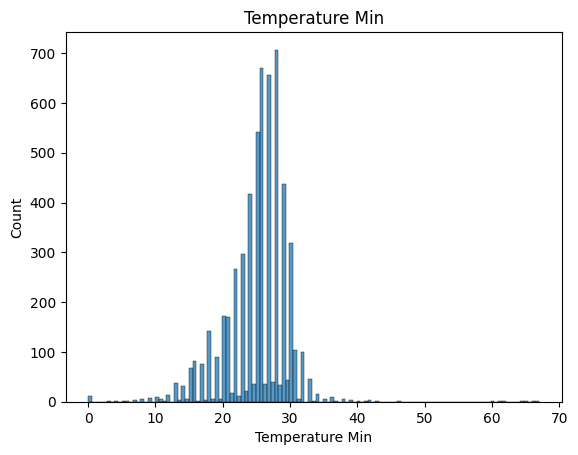

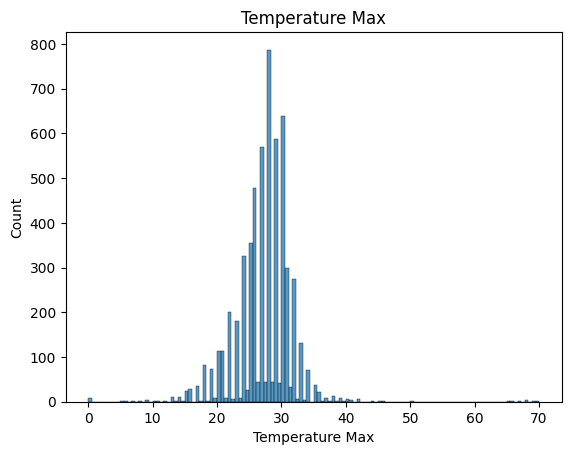

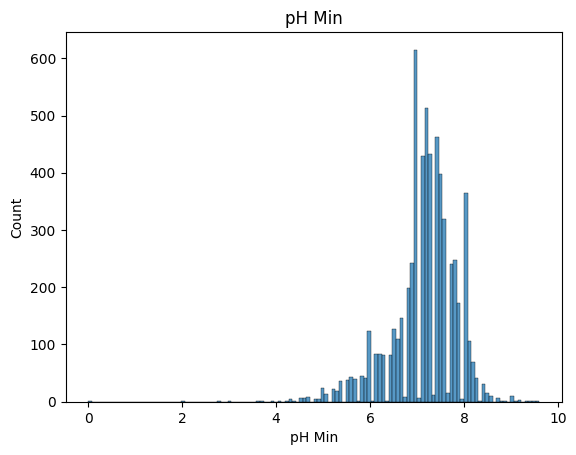

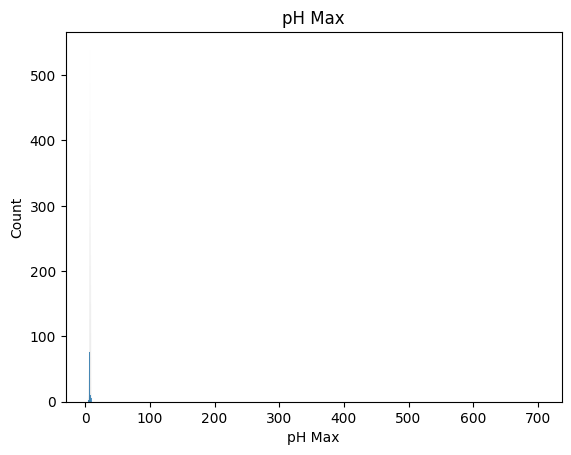

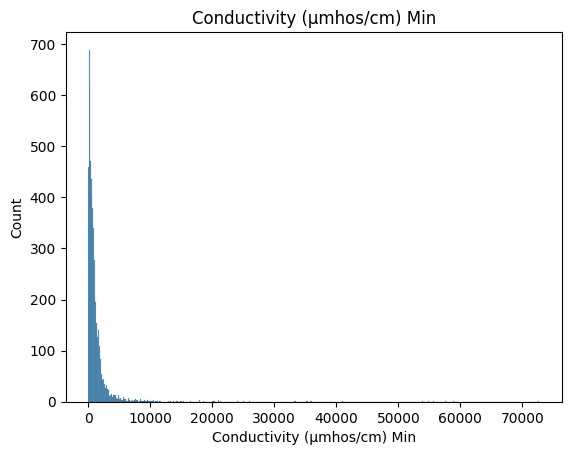

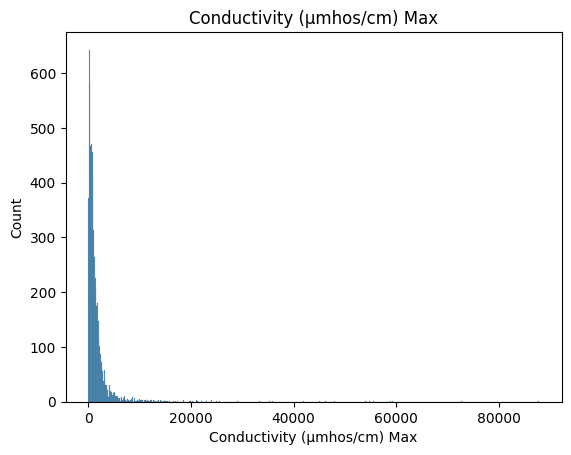

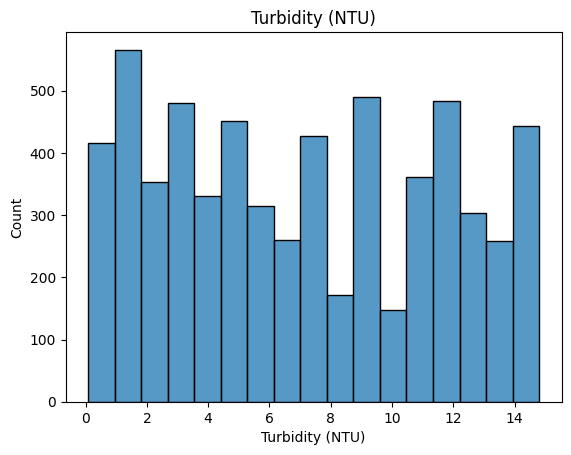

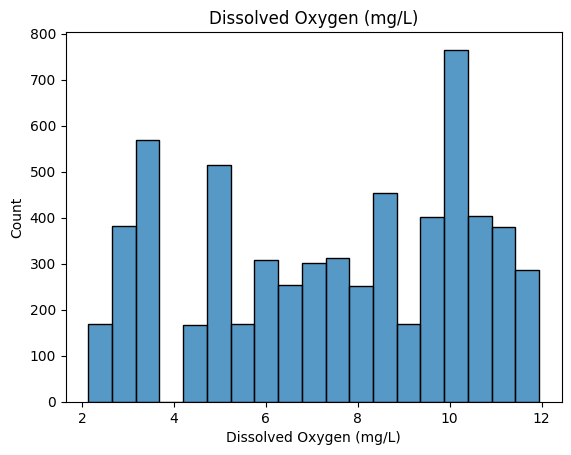

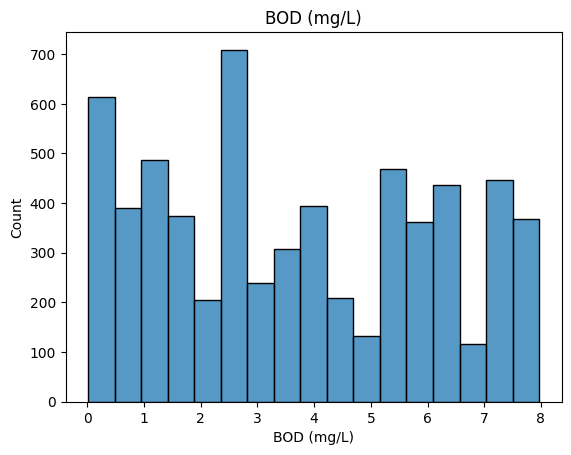

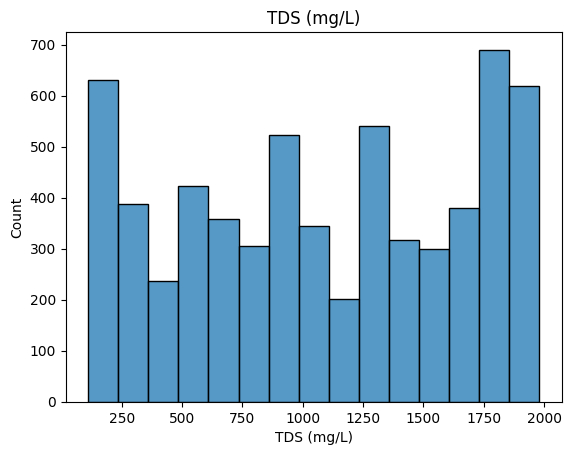

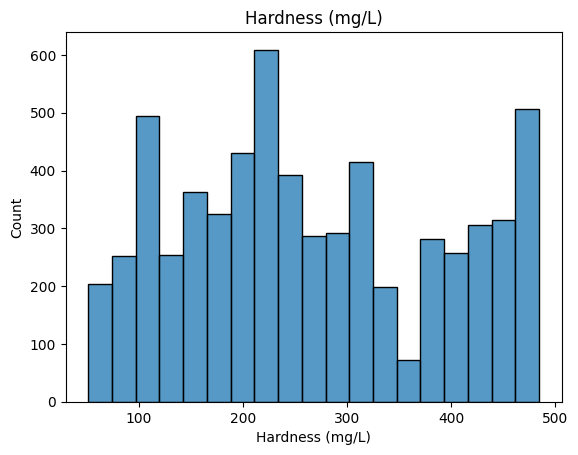

In [17]:
#histograms to understand the distribution
for i in selected_data.columns:
  sns.histplot(data=Dataset,x=i)
  plt.title(i)
  plt.show()


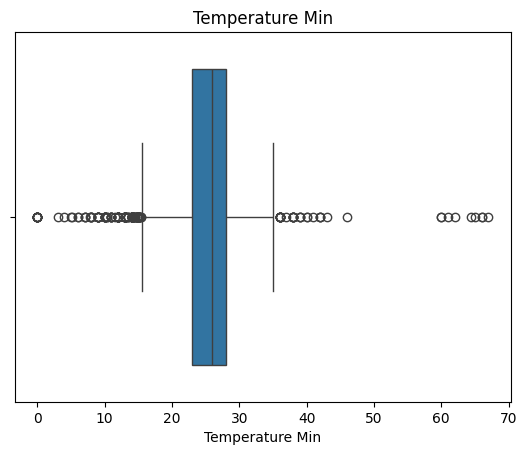

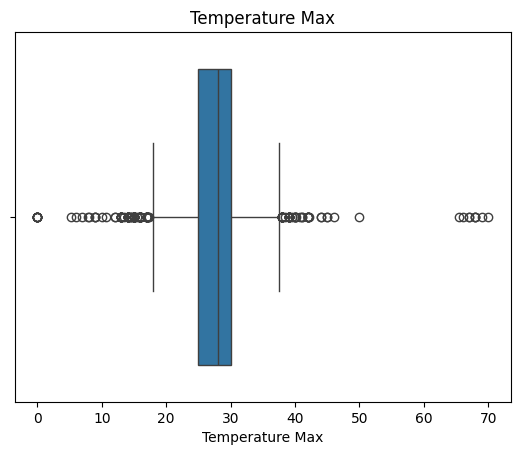

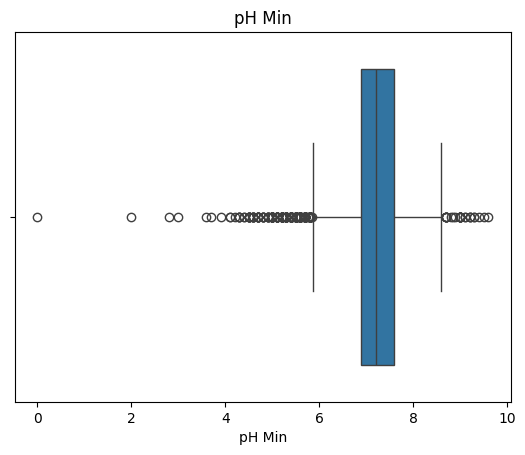

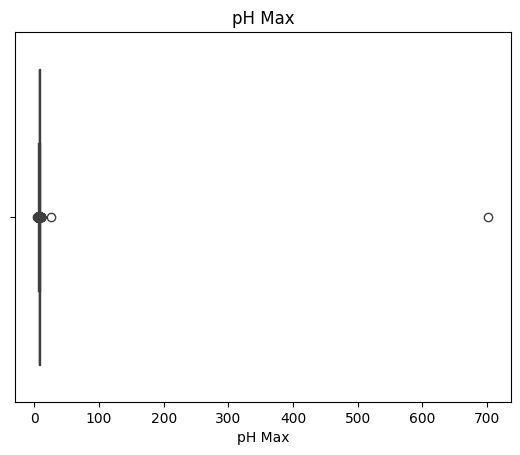

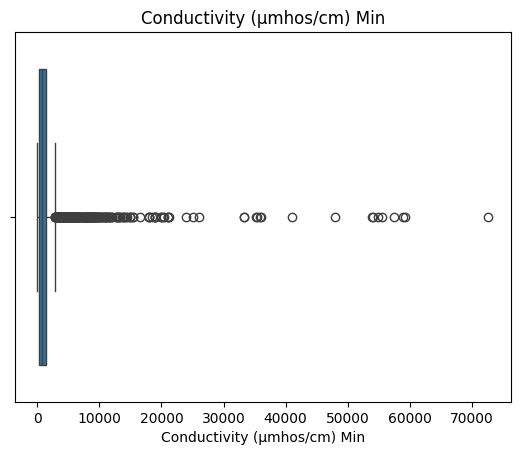

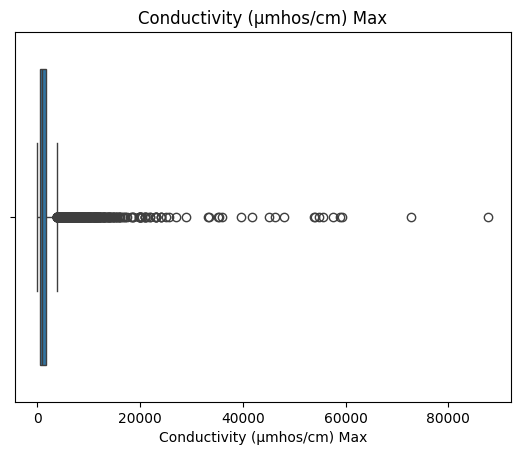

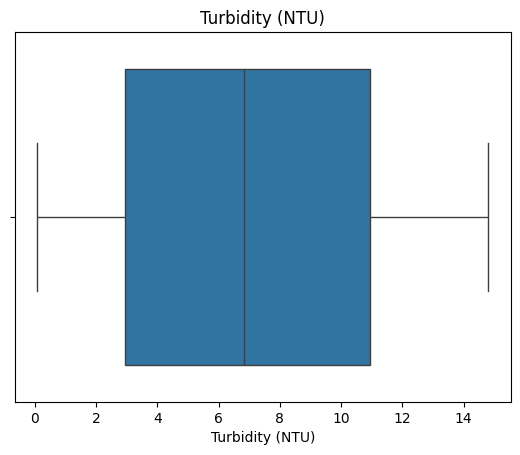

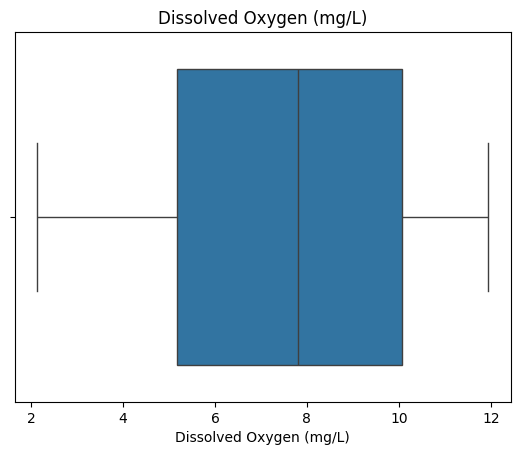

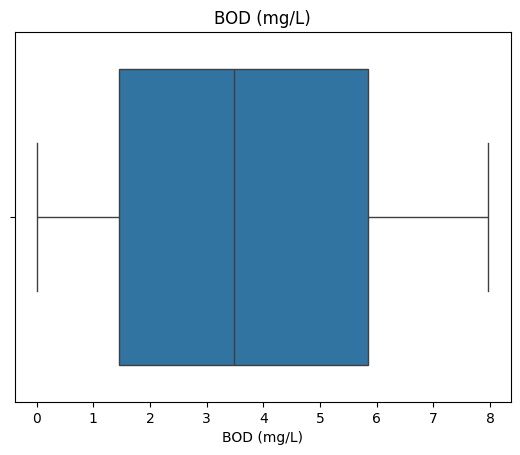

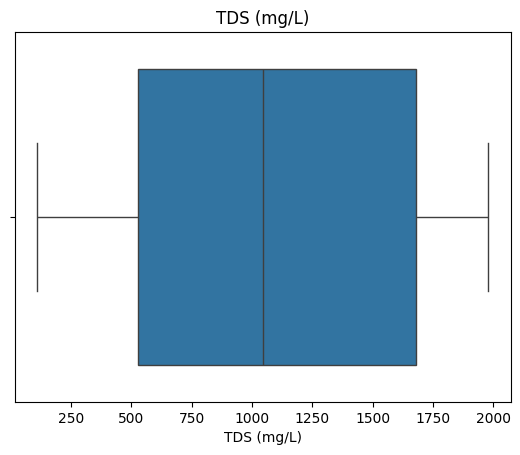

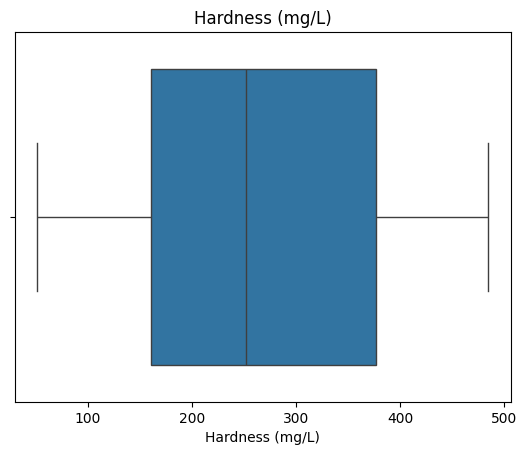

In [18]:
#Boxplot to identify Outliers
for i in selected_data.columns:
  sns.boxplot(data=Dataset,x=i)
  plt.title(i)
  plt.show()

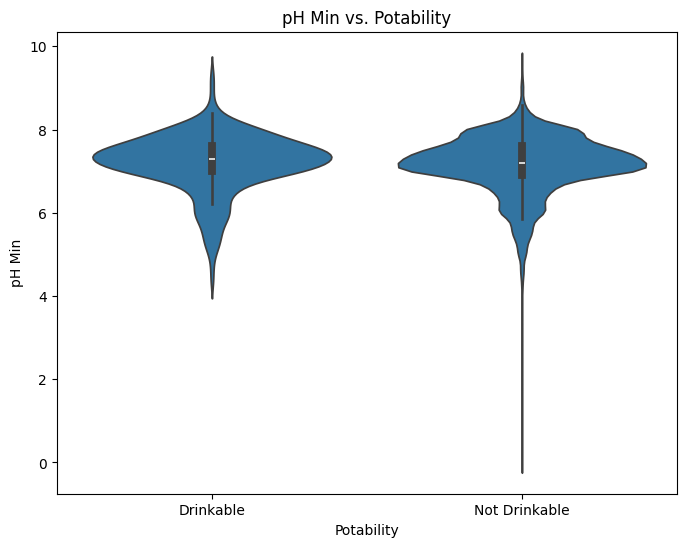

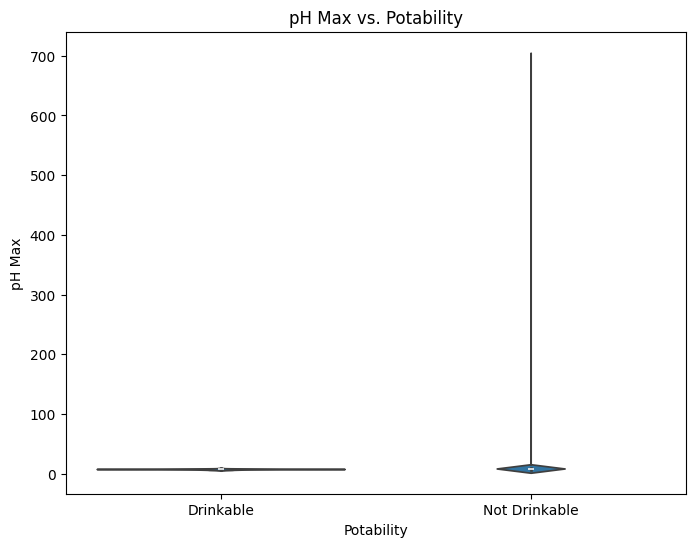

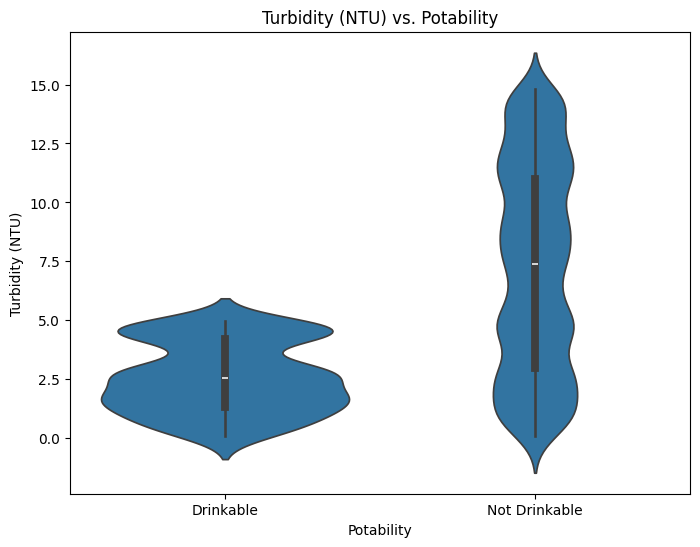

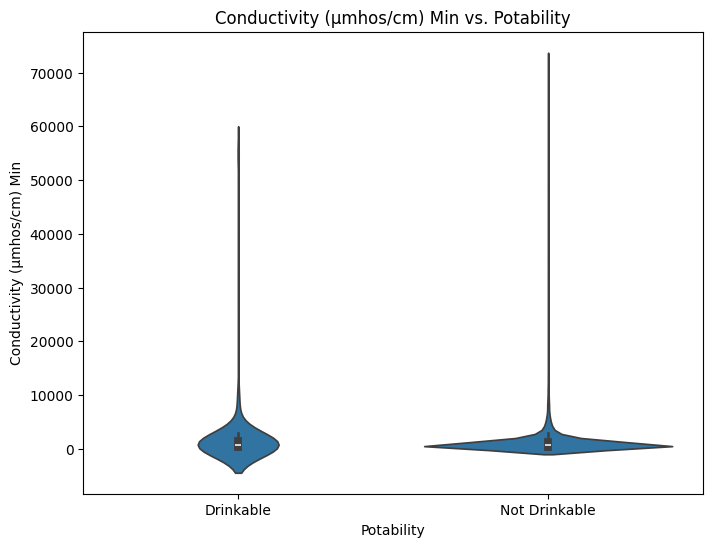

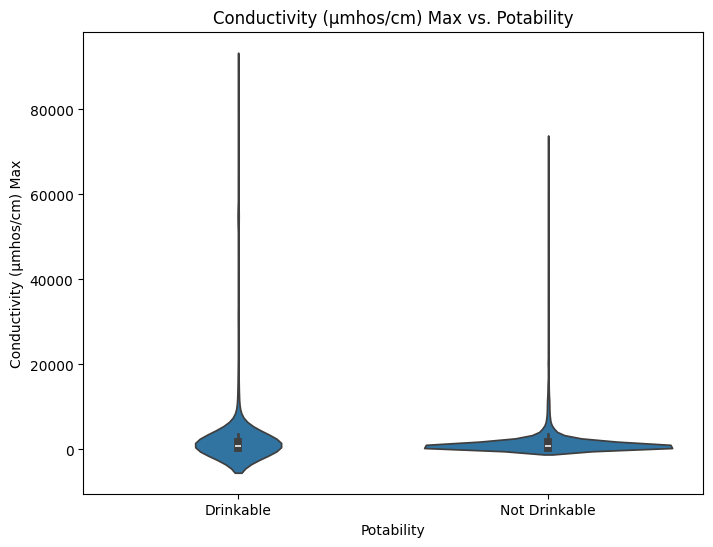

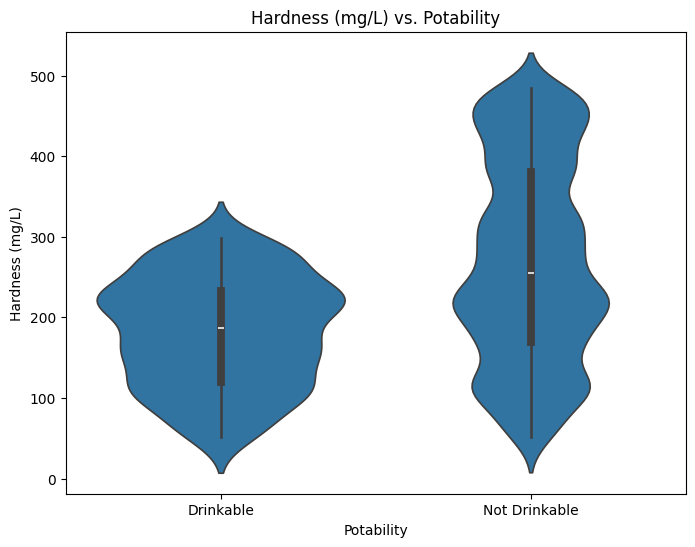

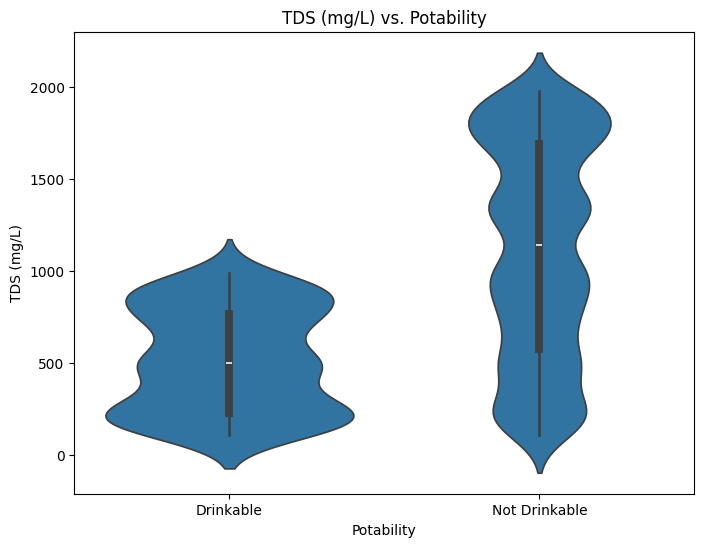

In [19]:
# prompt: give a best plotting technique which compares each attribute to potability other than histplot and boxplot

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'Dataset' and 'selected_data' are defined as in the previous code.

# Create a list of attributes to compare with potability
attributes = ['pH Min', 'pH Max', 'Turbidity (NTU)', 'Conductivity (µmhos/cm) Min',
              'Conductivity (µmhos/cm) Max', 'Hardness (mg/L)', 'TDS (mg/L)']

# Plotting using violinplots
for attribute in attributes:
    plt.figure(figsize=(8, 6))  # Adjust figure size as needed
    sns.violinplot(x='Potability', y=attribute, data=Dataset)
    plt.title(f'{attribute} vs. Potability')
    plt.xlabel('Potability')
    plt.ylabel(attribute)
    plt.show()

In [20]:
#correlation with heatmap to interpret the relation and multicolliniarity
corr =selected_data.corr()
corr

,Temperature Min,Temperature Max,pH Min,pH Max,Conductivity (µmhos/cm) Min,Conductivity (µmhos/cm) Max,Turbidity (NTU),Dissolved Oxygen (mg/L),BOD (mg/L),TDS (mg/L),Hardness (mg/L)
Temperature Min,1.000000,0.830448,0.123377,0.013942,0.089000,0.073487,0.009061,0.009368,-0.000166,-0.003191,0.011672
Temperature Max,0.830448,1.000000,0.081674,0.015695,0.065954,0.072768,-0.012094,0.019866,-0.010335,0.006327,-0.003233
pH Min,0.123377,0.081674,1.000000,0.070006,0.159941,0.163665,0.007405,0.000337,-0.010276,-0.017512,-0.001897
pH Max,0.013942,0.015695,0.070006,1.000000,0.013070,0.014312,0.002247,-0.019785,0.013073,-0.002856,0.000642
Conductivity (µmhos/cm) Min,0.089000,0.065954,0.159941,0.013070,1.000000,0.909731,-0.003163,0.027068,-0.015542,-0.014877,-0.009364
Conductivity (µmhos/cm) Max,0.073487,0.072768,0.163665,0.014312,0.909731,1.000000,0.001569,0.029100,-0.012572,-0.015586,-0.009966
Turbidity (NTU),0.009061,-0.012094,0.007405,0.002247,-0.003163,0.001569,1.000000,0.009649,-0.004839,0.009203,0.016756
Dissolved Oxygen (mg/L),0.009368,0.019866,0.000337,-0.019785,0.027068,0.029100,0.009649,1.000000,-0.006262,-0.000074,0.024323
BOD (mg/L),-0.000166,-0.010335,-0.010276,0.013073,-0.015542,-0.012572,-0.004839,-0.006262,1.000000,0.011733,0.000750
TDS (mg/L),-0.003191,0.006327,-0.017512,-0.002856,-0.014877,-0.015586,0.009203,-0.000074,0.011733,1.000000,-0.004154


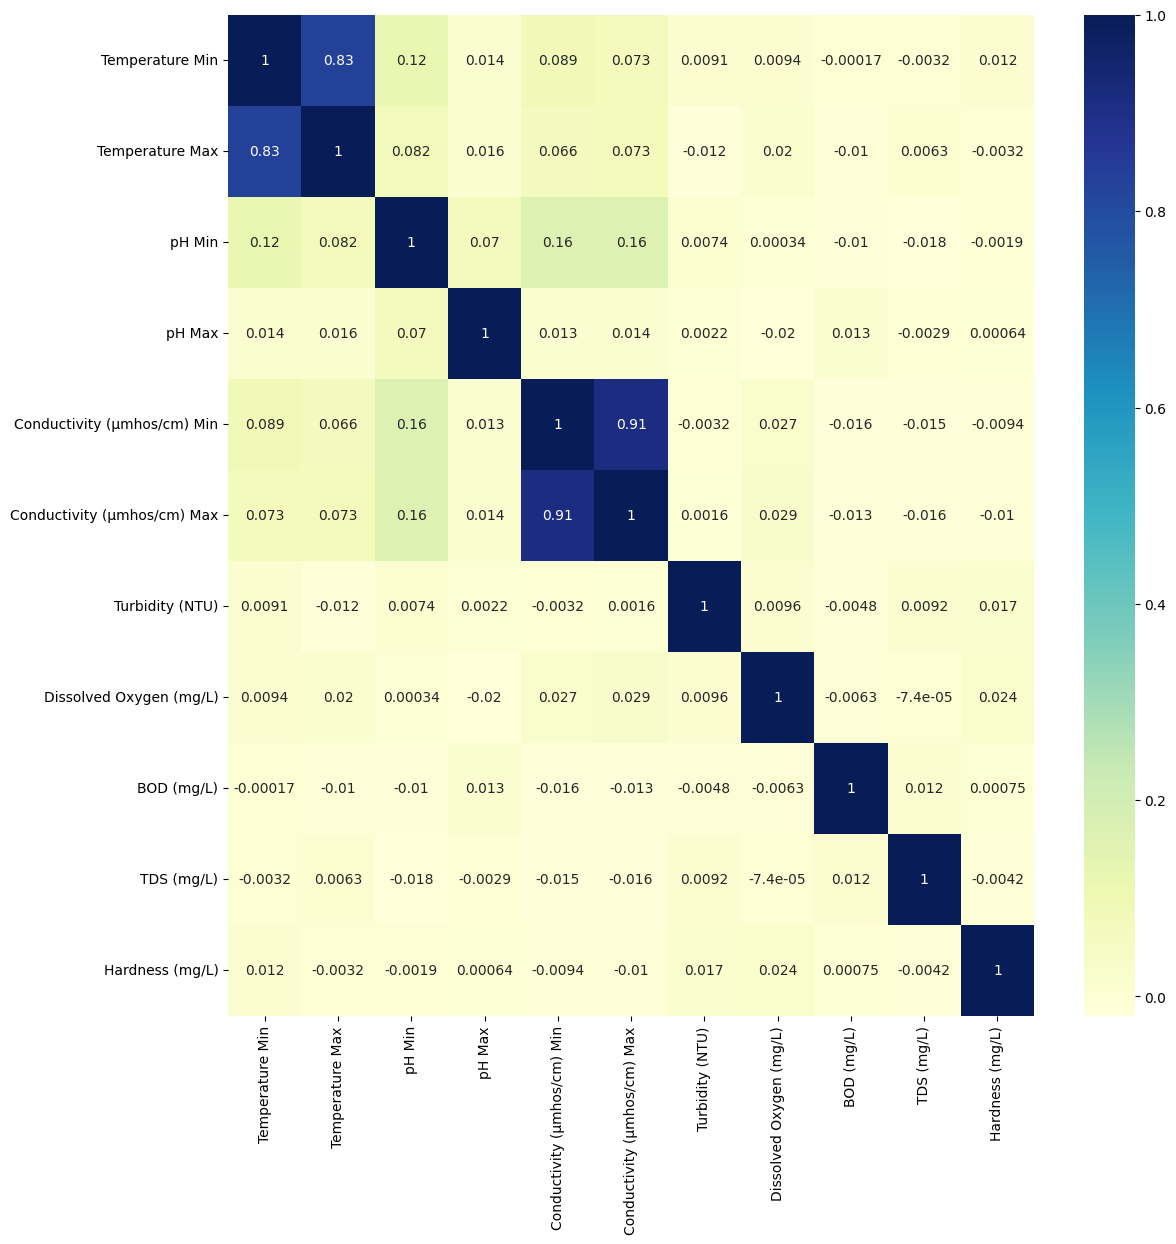

In [21]:
plt.figure(figsize=(13,13))
sns.heatmap(corr, annot=True, cmap="YlGnBu") # Change 'YlGnBu' to your desired colormap
plt.show()

##MISSING VALUE TREATMENT

In [22]:
Dataset.isnull().sum()

,0
Unnamed: 0,0
Station Code,76
Station Name,49
STATE,75
Temperature Min,498
Temperature Max,498
pH Min,121
pH Max,121
Conductivity (µmhos/cm) Min,192
Conductivity (µmhos/cm) Max,192


In [23]:
columns_to_impute = ['Turbidity (NTU)', 'Dissolved Oxygen (mg/L)', 'BOD (mg/L)', 'TDS (mg/L)', 'Hardness (mg/L)']

# Apply median imputation for each column
for column in columns_to_impute:
    median_value = Dataset[column].median()
    Dataset[column]=Dataset[column].fillna(median_value)

In [24]:
Dataset.isnull().sum()

,0
Unnamed: 0,0
Station Code,76
Station Name,49
STATE,75
Temperature Min,498
Temperature Max,498
pH Min,121
pH Max,121
Conductivity (µmhos/cm) Min,192
Conductivity (µmhos/cm) Max,192


In [25]:
import pandas as pd
from sklearn.impute import KNNImputer

knn_impute = ['Temperature Min', 'Temperature Max', 'pH Min', 'pH Max',
                     'Conductivity (µmhos/cm) Min', 'Conductivity (µmhos/cm) Max']

# Create a KNNImputer instance (using k=5 as a common choice)
imputer = KNNImputer(n_neighbors=5)

# Apply KNN imputation only to the specified columns
Dataset[knn_impute] = imputer.fit_transform(Dataset[knn_impute])


In [26]:
Dataset.isnull().sum()

,0
Unnamed: 0,0
Station Code,76
Station Name,49
STATE,75
Temperature Min,0
Temperature Max,0
pH Min,0
pH Max,0
Conductivity (µmhos/cm) Min,0
Conductivity (µmhos/cm) Max,0


In [27]:
Dataset = Dataset.dropna(subset=['Station Code'])
Dataset.isnull().sum()

,0
Unnamed: 0,0
Station Code,0
Station Name,0
STATE,0
Temperature Min,0
Temperature Max,0
pH Min,0
pH Max,0
Conductivity (µmhos/cm) Min,0
Conductivity (µmhos/cm) Max,0


In [28]:
Dataset

,Unnamed: 0,Station Code,Station Name,STATE,Temperature Min,Temperature Max,pH Min,pH Max,Conductivity (µmhos/cm) Min,Conductivity (µmhos/cm) Max,Year,Turbidity (NTU),Dissolved Oxygen (mg/L),BOD (mg/L),TDS (mg/L),Hardness (mg/L),Potability
0,0,15.0,"WELL AT KUYYURA, A.P.",ANDHRA PRADESH,23.0,28.0,6.82,7.85,195.0,226.0,2012,4.070235,10.134345,0.962008,578.810775,104.950680,Drinkable
1,1,16.0,WELL AT TADAVAI A.P.,ANDHRA PRADESH,27.0,28.0,7.21,7.72,663.0,1121.0,2012,11.564508,10.595564,7.927889,529.066337,205.746813,Not Drinkable
2,2,26.0,"WELL AT VIJAYWADA, A.P.",ANDHRA PRADESH,26.0,32.0,7.19,7.39,1601.0,1661.0,2012,14.543769,10.297229,1.070086,920.225147,217.964732,Not Drinkable
3,3,27.0,"WELL AT PEDDAVOORA, A.P.",ANDHRA PRADESH,26.0,27.0,7.82,8.80,1420.0,1668.0,2012,11.564508,10.297229,6.486625,1198.784496,182.125474,Not Drinkable
4,4,1513.0,"B W. - KRISHNA MURTHY, D.NO. 48-16-43 AUTONAGA...",ANDHRA PRADESH,25.0,30.0,6.80,7.11,1454.0,1575.0,2012,10.979909,3.262711,6.434438,1043.741646,123.066151,Not Drinkable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6311,983,2533.0,SURI TOWN NEAR BUS STAND,WEST BENGAL,27.0,30.0,7.20,7.90,358.0,651.0,2021,7.840992,8.334117,6.326797,723.104180,472.638138,Not Drinkable
6312,984,1773.0,"TANGRA, CALCUTTA , WEST\nBENGAL",WEST BENGAL,28.0,31.0,7.30,7.40,1435.0,1730.0,2021,4.675666,7.811954,5.193830,230.164378,234.763384,Not Drinkable
6313,985,1774.0,"TOPSIA CALCUTTA, WEST\nBENGAL",WEST BENGAL,29.0,31.0,7.30,7.30,1705.0,1921.0,2021,6.479175,5.978842,6.091671,920.225147,123.066151,Not Drinkable
6314,986,2546.0,ULUBERIA COLLEGE AT HOWRAH,WEST BENGAL,26.0,30.0,7.20,7.60,909.0,1090.0,2021,1.465082,8.737017,6.525324,480.030896,373.339982,Not Drinkable


##Handling Outliers

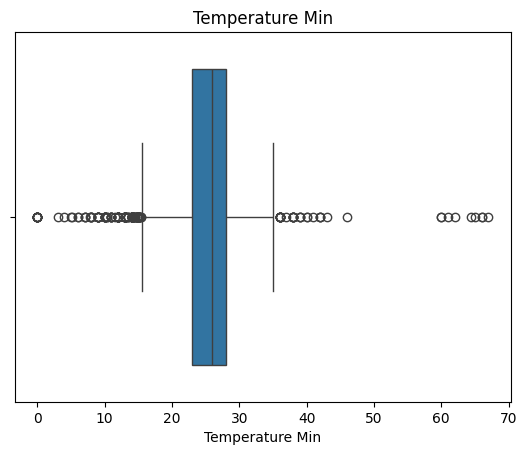

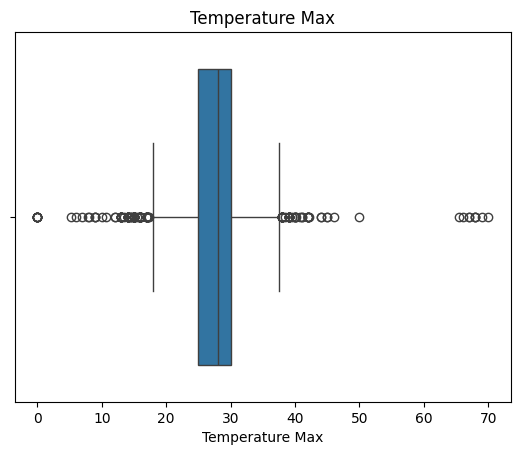

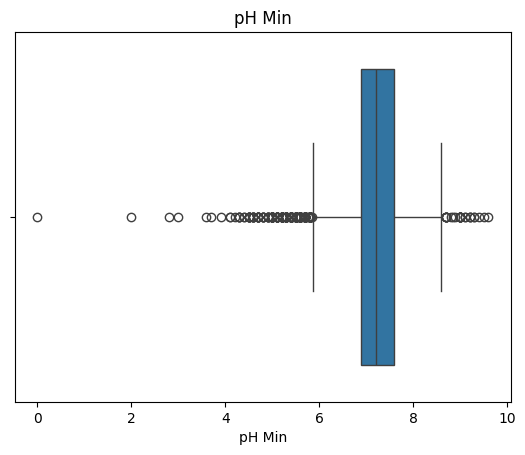

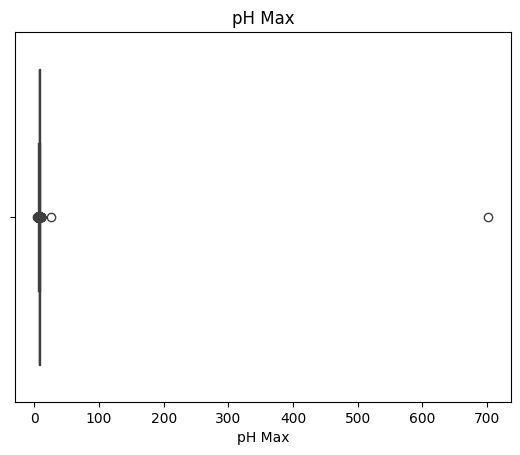

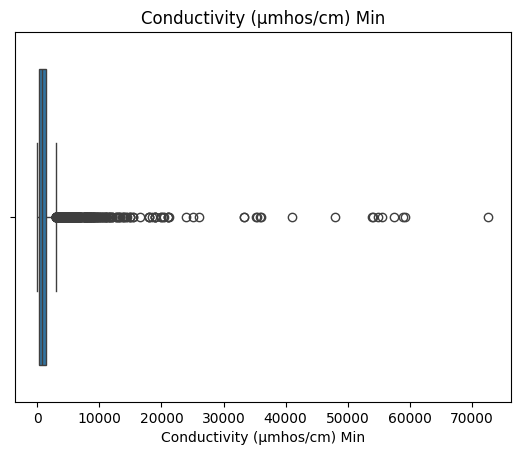

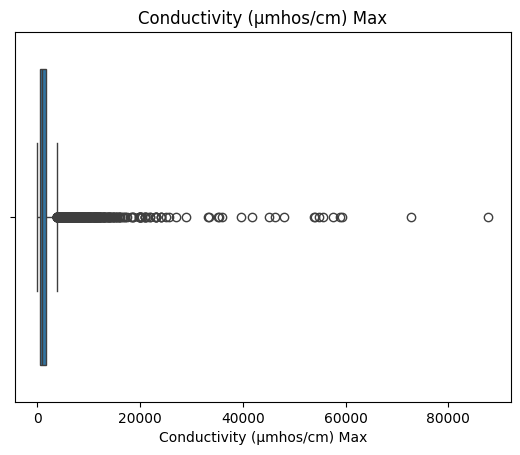

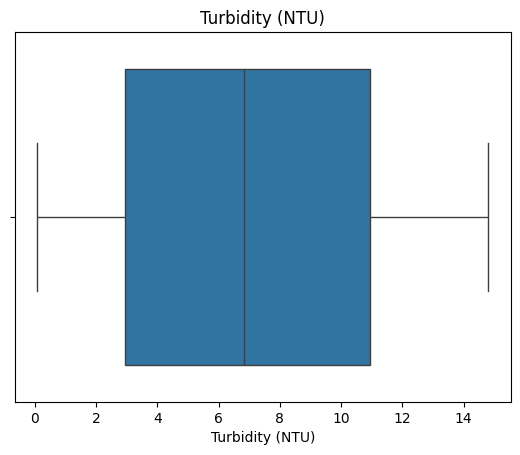

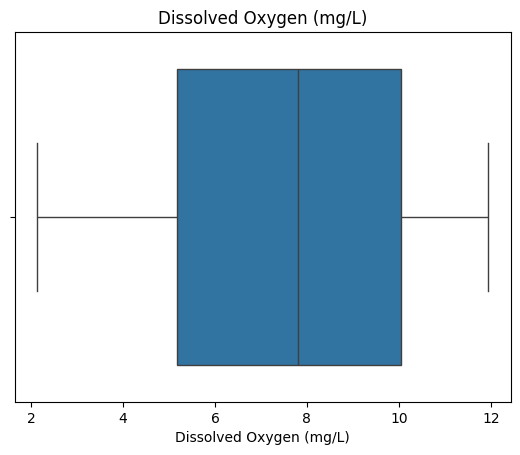

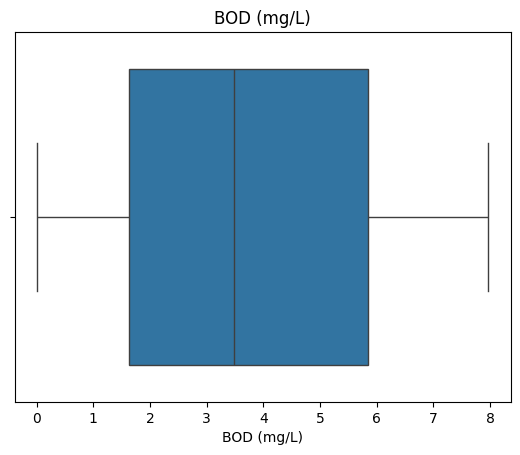

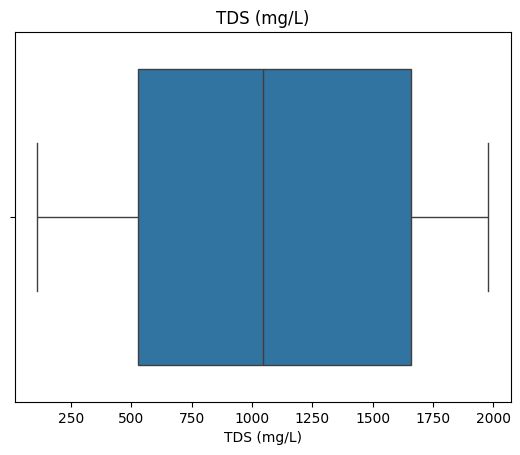

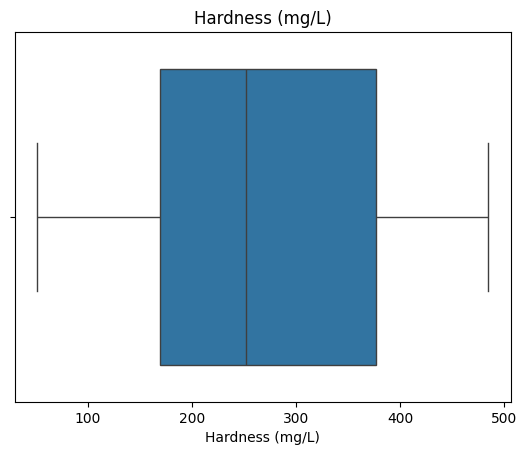

In [29]:
for i in selected_data.columns:
  sns.boxplot(data=Dataset,x=i)
  plt.title(i)
  plt.show()

In [30]:
def wisker(col):
  q1,q3 = np.percentile(col,[25,75])
  iqr = q3-q1
  lower_bound = q1 - (1.5*iqr)
  upper_bound = q3 + (1.5*iqr)
  return lower_bound,upper_bound

In [31]:
Dataset.columns

Index(['Unnamed: 0', 'Station Code', 'Station Name', 'STATE',
       'Temperature Min', 'Temperature Max', 'pH Min', 'pH Max',
       'Conductivity (µmhos/cm) Min', 'Conductivity (µmhos/cm) Max', 'Year',
       'Turbidity (NTU)', 'Dissolved Oxygen (mg/L)', 'BOD (mg/L)',
       'TDS (mg/L)', 'Hardness (mg/L)', 'Potability'],
      dtype='object')

In [32]:


for i in ['Temperature Min', 'Temperature Max', 'pH Min', 'pH Max',
          'Conductivity (µmhos/cm) Min', 'Conductivity (µmhos/cm) Max']:
    lower_bound, upper_bound = wisker(Dataset[i])

    # Use .loc to limit values to within the whisker range
    Dataset.loc[Dataset[i] > upper_bound, i] = upper_bound
    Dataset.loc[Dataset[i] < lower_bound, i] = lower_bound


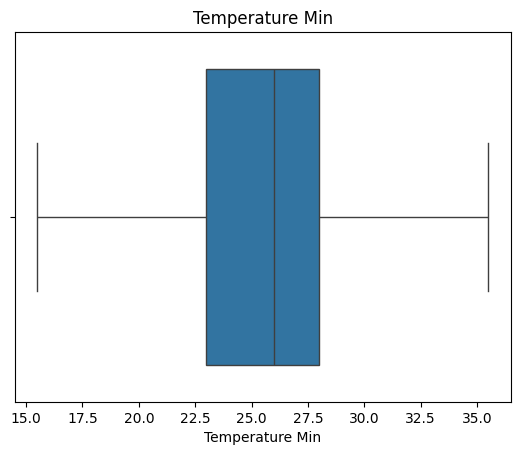

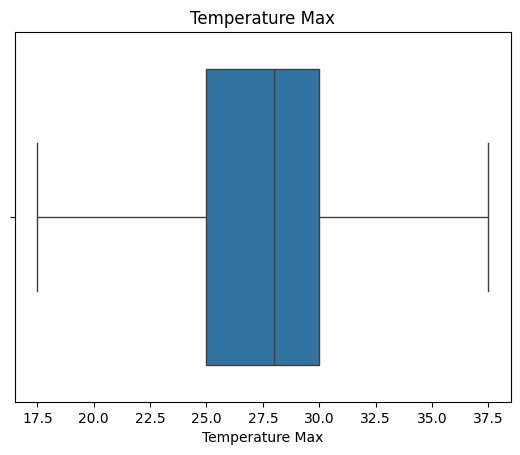

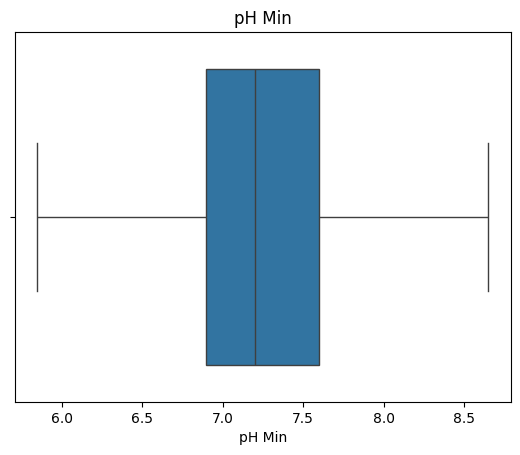

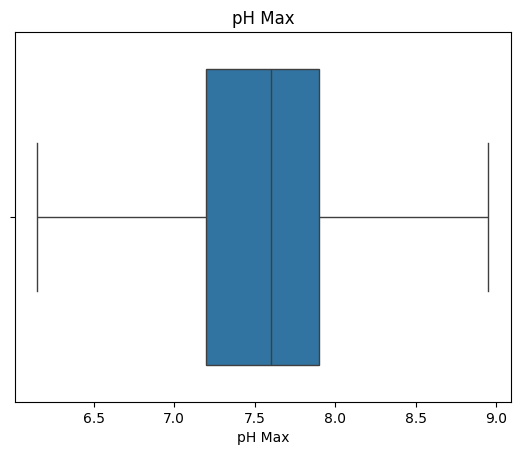

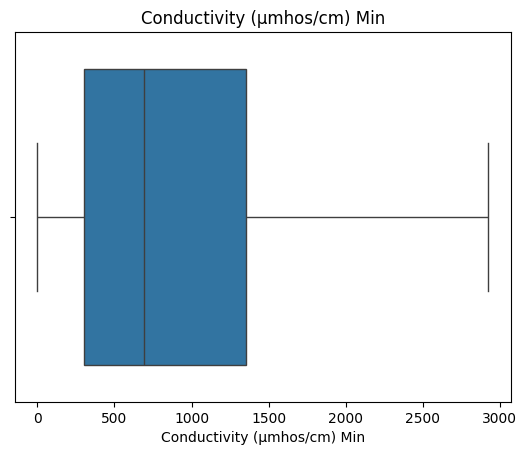

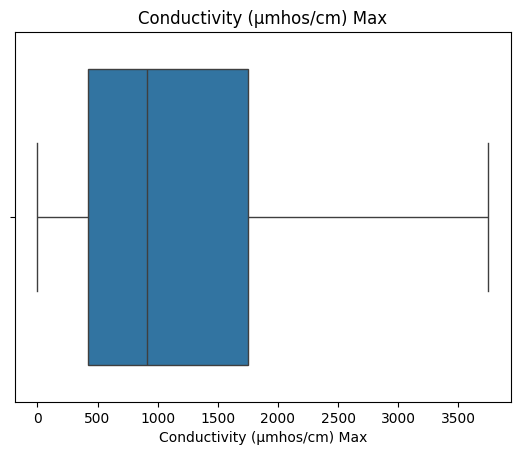

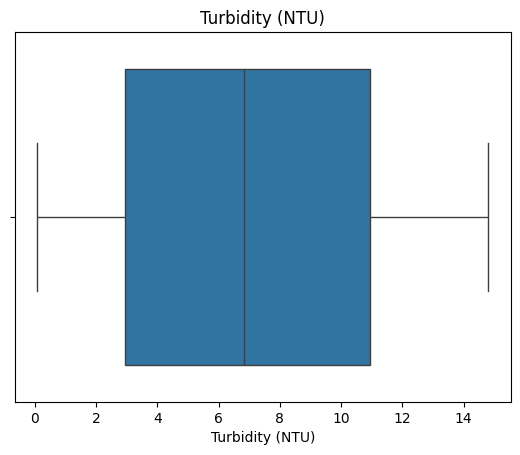

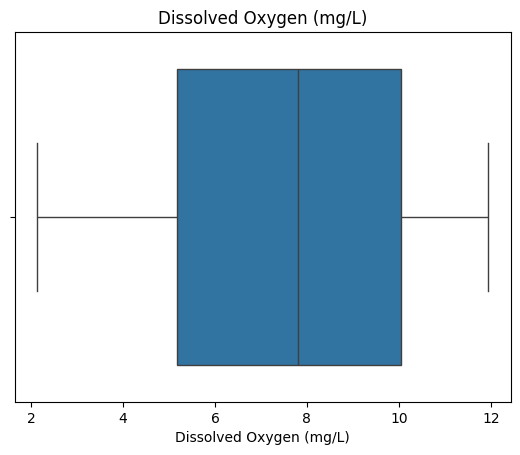

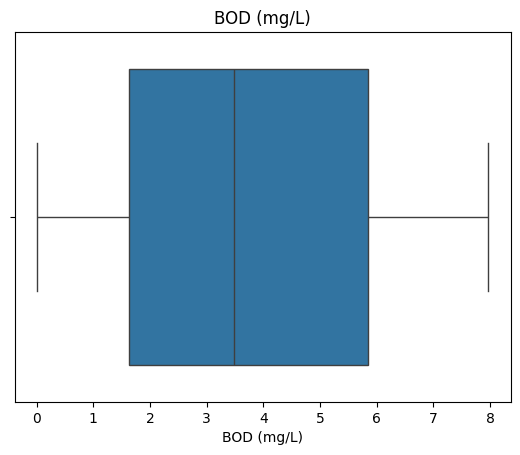

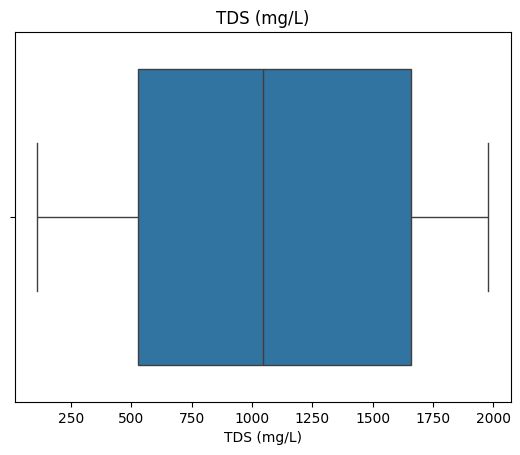

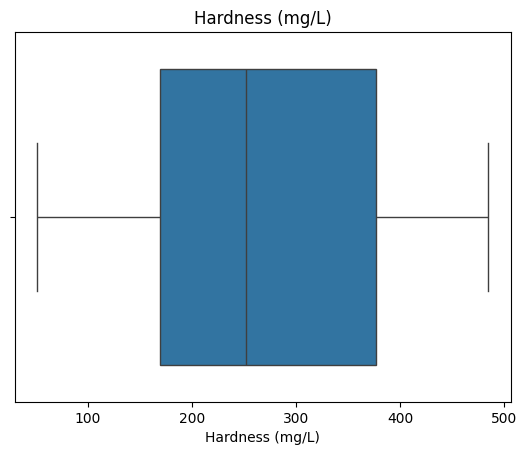

In [33]:
for i in selected_data.columns:
  sns.boxplot(data=Dataset,x=i)
  plt.title(i)
  plt.show()

##Added columns like Temperature Mean,pH Mean and Conductivity Mean

In [34]:
Dataset = Dataset.assign(
       pH_Mean=(Dataset['pH Min'] + Dataset['pH Max']) / 2,
       Conductivity_Mean=(Dataset['Conductivity (µmhos/cm) Min'] + Dataset['Conductivity (µmhos/cm) Max']) / 2,
       Temperature_Mean=(Dataset['Temperature Min'] + Dataset['Temperature Max']) / 2
   )


In [35]:
Dataset

,Unnamed: 0,Station Code,Station Name,STATE,Temperature Min,Temperature Max,pH Min,pH Max,Conductivity (µmhos/cm) Min,Conductivity (µmhos/cm) Max,Year,Turbidity (NTU),Dissolved Oxygen (mg/L),BOD (mg/L),TDS (mg/L),Hardness (mg/L),Potability,pH_Mean,Conductivity_Mean,Temperature_Mean
0,0,15.0,"WELL AT KUYYURA, A.P.",ANDHRA PRADESH,23.0,28.0,6.82,7.85,195.0,226.0,2012,4.070235,10.134345,0.962008,578.810775,104.950680,Drinkable,7.335,210.5,25.5
1,1,16.0,WELL AT TADAVAI A.P.,ANDHRA PRADESH,27.0,28.0,7.21,7.72,663.0,1121.0,2012,11.564508,10.595564,7.927889,529.066337,205.746813,Not Drinkable,7.465,892.0,27.5
2,2,26.0,"WELL AT VIJAYWADA, A.P.",ANDHRA PRADESH,26.0,32.0,7.19,7.39,1601.0,1661.0,2012,14.543769,10.297229,1.070086,920.225147,217.964732,Not Drinkable,7.290,1631.0,29.0
3,3,27.0,"WELL AT PEDDAVOORA, A.P.",ANDHRA PRADESH,26.0,27.0,7.82,8.80,1420.0,1668.0,2012,11.564508,10.297229,6.486625,1198.784496,182.125474,Not Drinkable,8.310,1544.0,26.5
4,4,1513.0,"B W. - KRISHNA MURTHY, D.NO. 48-16-43 AUTONAGA...",ANDHRA PRADESH,25.0,30.0,6.80,7.11,1454.0,1575.0,2012,10.979909,3.262711,6.434438,1043.741646,123.066151,Not Drinkable,6.955,1514.5,27.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6311,983,2533.0,SURI TOWN NEAR BUS STAND,WEST BENGAL,27.0,30.0,7.20,7.90,358.0,651.0,2021,7.840992,8.334117,6.326797,723.104180,472.638138,Not Drinkable,7.550,504.5,28.5
6312,984,1773.0,"TANGRA, CALCUTTA , WEST\nBENGAL",WEST BENGAL,28.0,31.0,7.30,7.40,1435.0,1730.0,2021,4.675666,7.811954,5.193830,230.164378,234.763384,Not Drinkable,7.350,1582.5,29.5
6313,985,1774.0,"TOPSIA CALCUTTA, WEST\nBENGAL",WEST BENGAL,29.0,31.0,7.30,7.30,1705.0,1921.0,2021,6.479175,5.978842,6.091671,920.225147,123.066151,Not Drinkable,7.300,1813.0,30.0
6314,986,2546.0,ULUBERIA COLLEGE AT HOWRAH,WEST BENGAL,26.0,30.0,7.20,7.60,909.0,1090.0,2021,1.465082,8.737017,6.525324,480.030896,373.339982,Not Drinkable,7.400,999.5,28.0


#DATA VISUALIZATION


# Assuming your data is loaded into a DataFrame called 'df'
# Replace this with your actual data loading code
# df = pd.read_csv('your_dataset.csv')

<Figure size 1200x600 with 0 Axes>

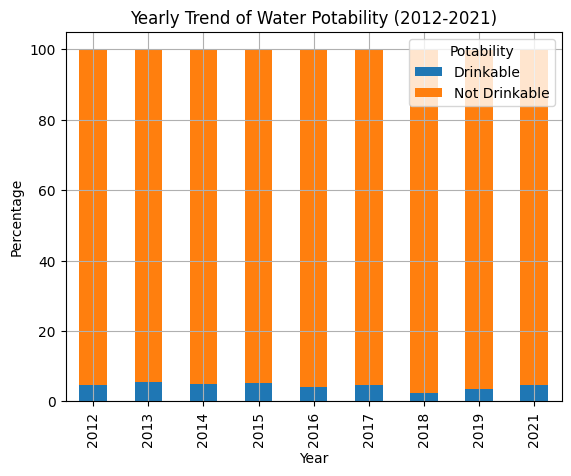

In [36]:




    # 1. Yearly Trend of Water Potability
    plt.figure(figsize=(12, 6))
    yearly_potability = Dataset.groupby(['Year', 'Potability']).size().unstack()
    yearly_potability_pct = yearly_potability.div(yearly_potability.sum(axis=1), axis=0) * 100
    yearly_potability_pct.plot(kind='bar', stacked=True)
    plt.title('Yearly Trend of Water Potability (2012-2021)')
    plt.xlabel('Year')
    plt.ylabel('Percentage')
    plt.legend(title='Potability')
    plt.grid(True)
    plt.show()




**Year-wise Quality Trend:**


1.Reveals long-term trends in water quality
2.Shows effectiveness of water management policies
3.Identifies periods of quality improvement or deterioration
4.Helps in future water quality predictions





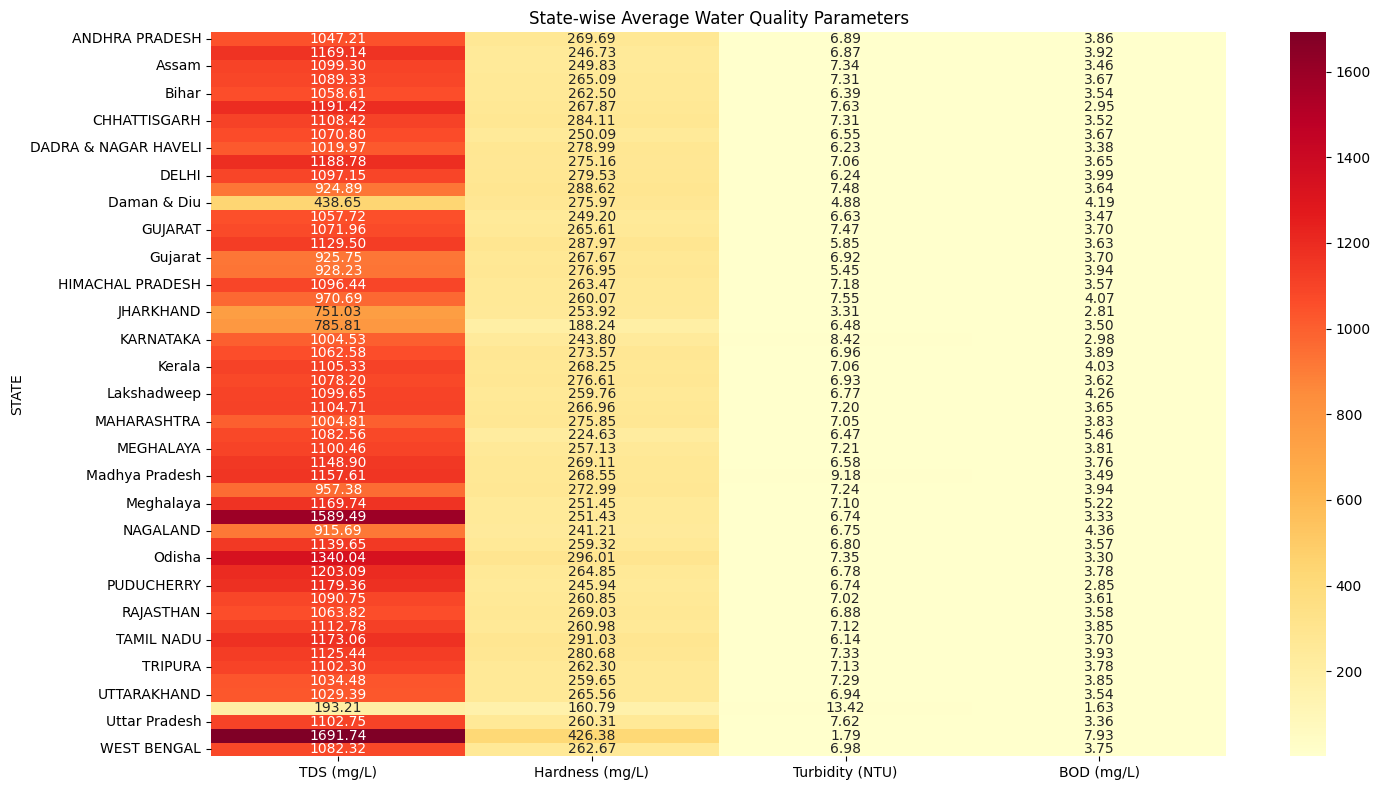

In [37]:
 # 2. State-wise Water Quality Heatmap
plt.figure(figsize=(15, 8)) # Removed extra indentation here
state_params = Dataset.groupby('STATE')[['TDS (mg/L)', 'Hardness (mg/L)', 'Turbidity (NTU)', 'BOD (mg/L)']].mean()
sns.heatmap(state_params, annot=True, fmt='.2f', cmap='YlOrRd')
plt.title('State-wise Average Water Quality Parameters')
plt.tight_layout()
plt.show()


***State-wise Quality Comparison:***


1.Compares overall water quality across states
2.Identifies states needing immediate intervention
3.Shows regional patterns in water quality
4.Useful for resource allocation

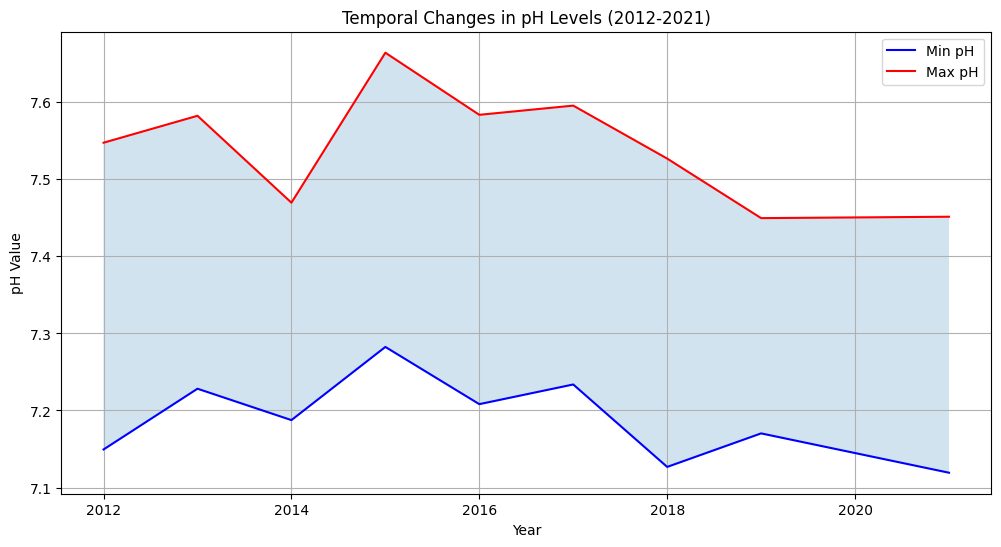

In [38]:
    # 3. Temporal Changes in pH Levels
    plt.figure(figsize=(12, 6))
    yearly_ph = Dataset.groupby('Year')[['pH Min', 'pH Max']].mean()
    plt.plot(yearly_ph.index, yearly_ph['pH Min'], 'b-', label='Min pH')
    plt.plot(yearly_ph.index, yearly_ph['pH Max'], 'r-', label='Max pH')
    plt.fill_between(yearly_ph.index, yearly_ph['pH Min'], yearly_ph['pH Max'], alpha=0.2)
    plt.title('Temporal Changes in pH Levels (2012-2021)')
    plt.xlabel('Year')
    plt.ylabel('pH Value')
    plt.legend()
    plt.grid(True)
    plt.show()

***pH Range Analysis:***


1.Shows state-wise variations in pH levels
2.Identifies states with concerning pH ranges
3.Helps in targeted pH treatment planning
4.Useful for ecological impact assessment

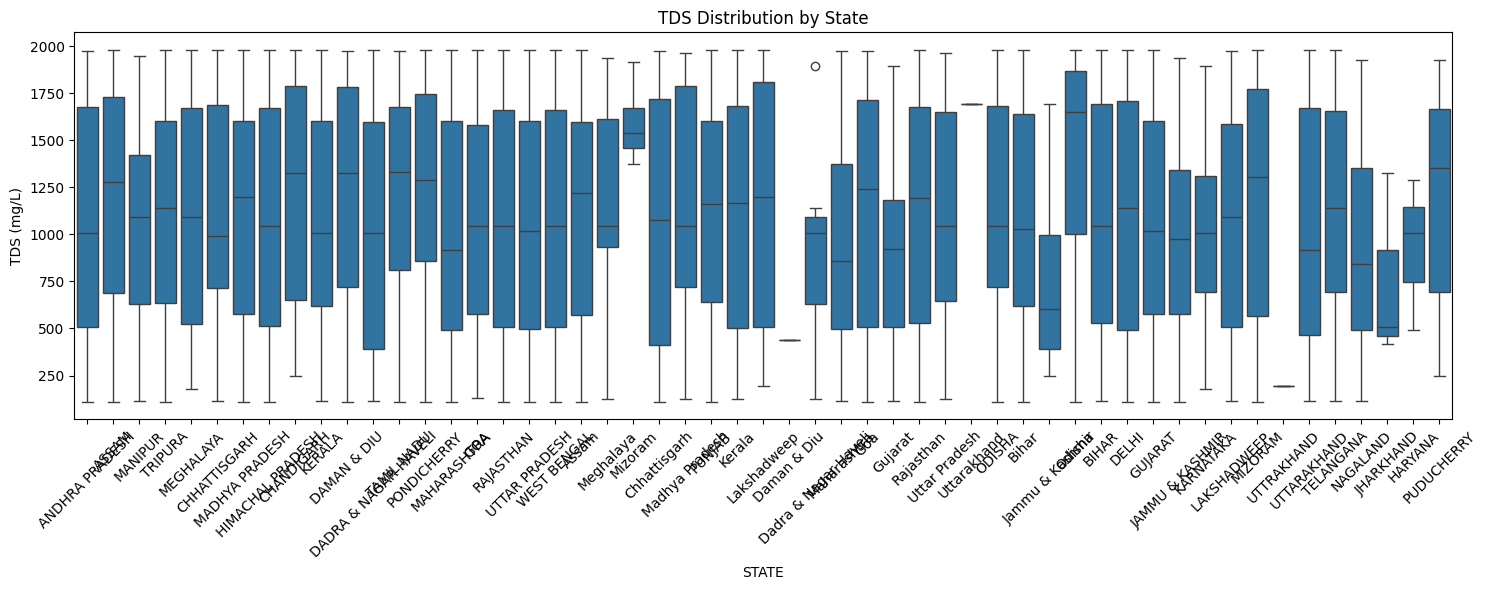

In [39]:
    # 4. Box Plot of TDS Distribution by State
    plt.figure(figsize=(15, 6))
    sns.boxplot(x='STATE', y='TDS (mg/L)', data=Dataset)
    plt.xticks(rotation=45)
    plt.title('TDS Distribution by State')
    plt.tight_layout()
    plt.show()


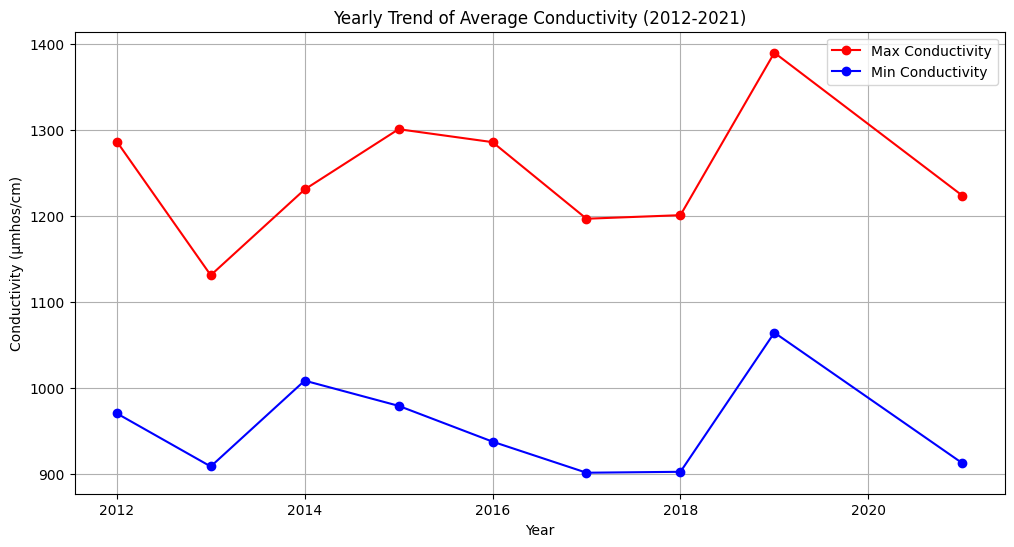

In [40]:
    # 5. Yearly Trend of Average Conductivity
    plt.figure(figsize=(12, 6))
    yearly_conductivity = Dataset.groupby('Year')[['Conductivity (µmhos/cm) Min', 'Conductivity (µmhos/cm) Max']].mean()
    plt.plot(yearly_conductivity.index, yearly_conductivity['Conductivity (µmhos/cm) Max'],
             'ro-', label='Max Conductivity')
    plt.plot(yearly_conductivity.index, yearly_conductivity['Conductivity (µmhos/cm) Min'],
             'bo-', label='Min Conductivity')
    plt.title('Yearly Trend of Average Conductivity (2012-2021)')
    plt.xlabel('Year')
    plt.ylabel('Conductivity (μmhos/cm)')
    plt.legend()
    plt.grid(True)
    plt.show()

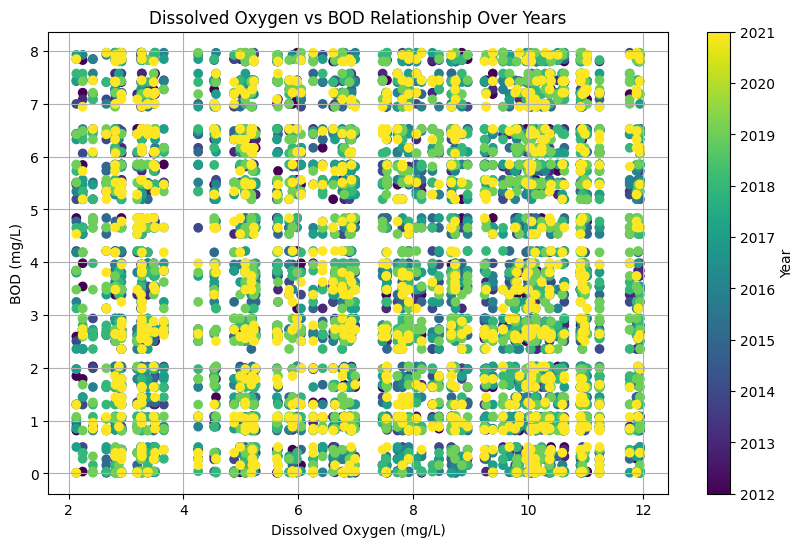

In [41]:
    # 6. Dissolved Oxygen vs BOD Scatter Plot with Year Color Coding
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(Dataset['Dissolved Oxygen (mg/L)'], Dataset['BOD (mg/L)'],
                         c=Dataset['Year'], cmap='viridis')
    plt.colorbar(scatter, label='Year')
    plt.xlabel('Dissolved Oxygen (mg/L)')
    plt.ylabel('BOD (mg/L)')
    plt.title('Dissolved Oxygen vs BOD Relationship Over Years')
    plt.grid(True)
    plt.show()

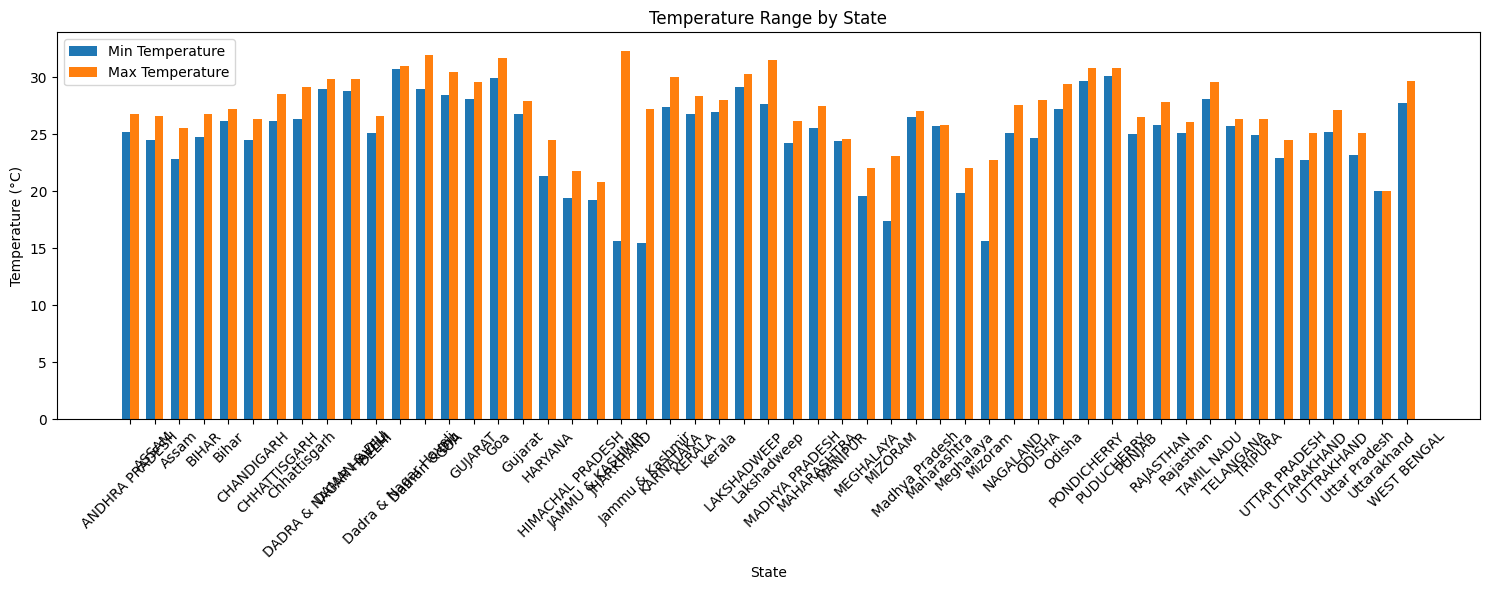

In [42]:
    # 7. Temperature Range by State and Season
    plt.figure(figsize=(15, 6))
    state_temp = Dataset.groupby('STATE')[['Temperature Min', 'Temperature Max']].mean()
    x = np.arange(len(state_temp.index))
    width = 0.35
    plt.bar(x - width/2, state_temp['Temperature Min'], width, label='Min Temperature')
    plt.bar(x + width/2, state_temp['Temperature Max'], width, label='Max Temperature')
    plt.xlabel('State')
    plt.ylabel('Temperature (°C)')
    plt.title('Temperature Range by State')
    plt.xticks(x, state_temp.index, rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

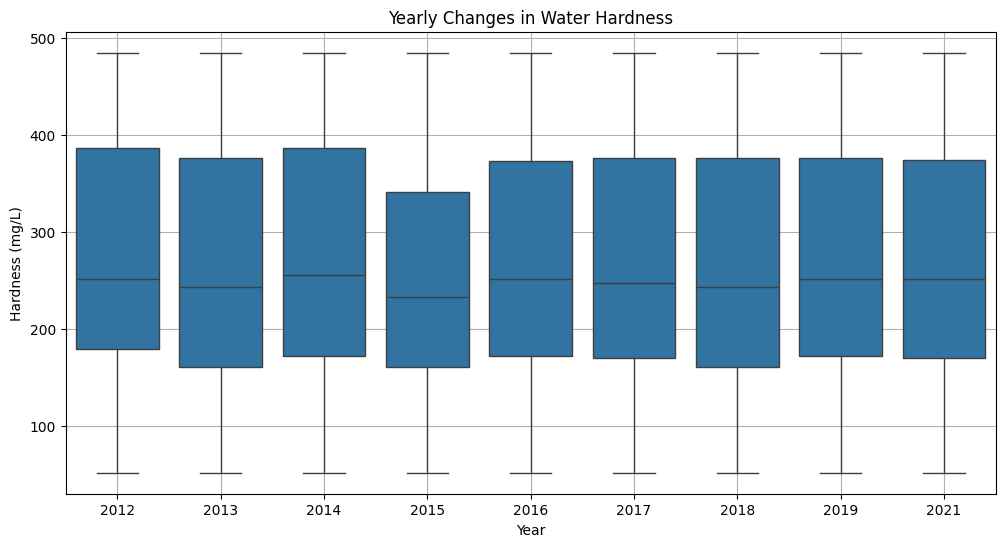

In [43]:
    # 8. Yearly Changes in Water Hardness
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Year', y='Hardness (mg/L)', data=Dataset)
    plt.title('Yearly Changes in Water Hardness')
    plt.xlabel('Year')
    plt.ylabel('Hardness (mg/L)')
    plt.grid(True)
    plt.show()

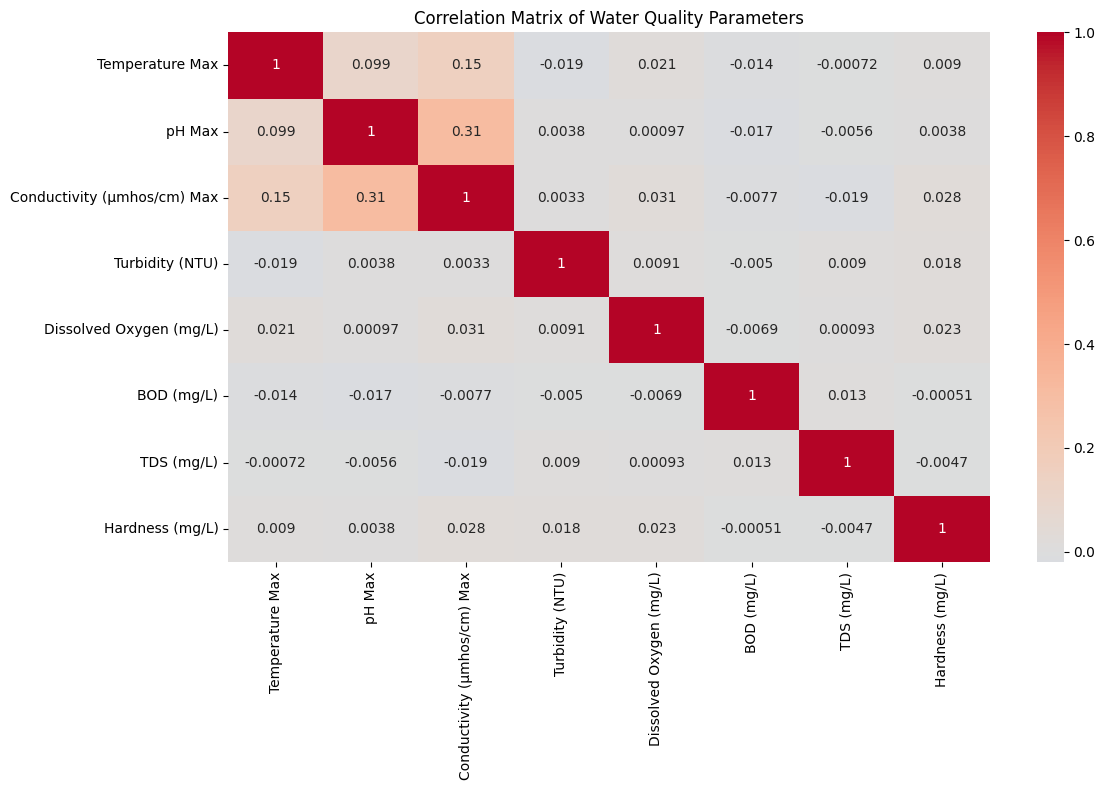

In [44]:
# 9. Correlation Matrix Over Time
plt.figure(figsize=(12, 8))
numeric_cols = ['Temperature Max', 'pH Max', 'Conductivity (µmhos/cm) Max',
               'Turbidity (NTU)', 'Dissolved Oxygen (mg/L)', 'BOD (mg/L)', 'TDS (mg/L)', 'Hardness (mg/L)']
# Replacing 'df' with 'Dataset' to access the DataFrame containing the data
correlation = Dataset[numeric_cols].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Water Quality Parameters')
plt.tight_layout()
plt.show()

<Figure size 1500x600 with 0 Axes>

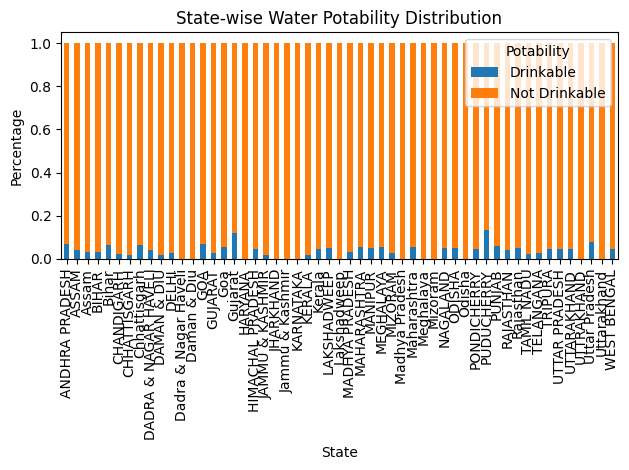

In [45]:
    # 10. State-wise Potability Analysis
    plt.figure(figsize=(15, 6))
    state_potability = Dataset.groupby('STATE')['Potability'].value_counts(normalize=True).unstack()
    state_potability.plot(kind='bar', stacked=True)
    plt.title('State-wise Water Potability Distribution')
    plt.xlabel('State')
    plt.ylabel('Percentage')
    plt.legend(title='Potability')
    plt.tight_layout()
    plt.show()

#ENCODING

#One-hot encode the 'State' column

In [46]:
Dataset['STATE'] = Dataset['STATE'].str.replace('Uttrakhand', 'Uttarakhand', case=False)

In [47]:
Dataset['STATE'] = Dataset['STATE'].str.title().str.strip()

In [48]:
Dataset = pd.get_dummies(Dataset, columns=["STATE"], drop_first=True)
Dataset

,Unnamed: 0,Station Code,Station Name,Temperature Min,Temperature Max,pH Min,pH Max,Conductivity (µmhos/cm) Min,Conductivity (µmhos/cm) Max,Year,...,STATE_Pondicherry,STATE_Puducherry,STATE_Punjab,STATE_Rajasthan,STATE_Tamil Nadu,STATE_Telangana,STATE_Tripura,STATE_Uttar Pradesh,STATE_Uttarakhand,STATE_West Bengal
0,0,15.0,"WELL AT KUYYURA, A.P.",23.0,28.0,6.82,7.85,195.0,226.0,2012,...,False,False,False,False,False,False,False,False,False,False
1,1,16.0,WELL AT TADAVAI A.P.,27.0,28.0,7.21,7.72,663.0,1121.0,2012,...,False,False,False,False,False,False,False,False,False,False
2,2,26.0,"WELL AT VIJAYWADA, A.P.",26.0,32.0,7.19,7.39,1601.0,1661.0,2012,...,False,False,False,False,False,False,False,False,False,False
3,3,27.0,"WELL AT PEDDAVOORA, A.P.",26.0,27.0,7.82,8.80,1420.0,1668.0,2012,...,False,False,False,False,False,False,False,False,False,False
4,4,1513.0,"B W. - KRISHNA MURTHY, D.NO. 48-16-43 AUTONAGA...",25.0,30.0,6.80,7.11,1454.0,1575.0,2012,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6311,983,2533.0,SURI TOWN NEAR BUS STAND,27.0,30.0,7.20,7.90,358.0,651.0,2021,...,False,False,False,False,False,False,False,False,False,True
6312,984,1773.0,"TANGRA, CALCUTTA , WEST\nBENGAL",28.0,31.0,7.30,7.40,1435.0,1730.0,2021,...,False,False,False,False,False,False,False,False,False,True
6313,985,1774.0,"TOPSIA CALCUTTA, WEST\nBENGAL",29.0,31.0,7.30,7.30,1705.0,1921.0,2021,...,False,False,False,False,False,False,False,False,False,True
6314,986,2546.0,ULUBERIA COLLEGE AT HOWRAH,26.0,30.0,7.20,7.60,909.0,1090.0,2021,...,False,False,False,False,False,False,False,False,False,True


In [49]:
Dataset.columns

Index(['Unnamed: 0', 'Station Code', 'Station Name', 'Temperature Min',
       'Temperature Max', 'pH Min', 'pH Max', 'Conductivity (µmhos/cm) Min',
       'Conductivity (µmhos/cm) Max', 'Year', 'Turbidity (NTU)',
       'Dissolved Oxygen (mg/L)', 'BOD (mg/L)', 'TDS (mg/L)',
       'Hardness (mg/L)', 'Potability', 'pH_Mean', 'Conductivity_Mean',
       'Temperature_Mean', 'STATE_Assam', 'STATE_Bihar', 'STATE_Chandigarh',
       'STATE_Chhattisgarh', 'STATE_Dadra & Nagar Haveli', 'STATE_Daman & Diu',
       'STATE_Delhi', 'STATE_Goa', 'STATE_Gujarat', 'STATE_Haryana',
       'STATE_Himachal Pradesh', 'STATE_Jammu & Kashmir', 'STATE_Jharkhand',
       'STATE_Karnataka', 'STATE_Kerala', 'STATE_Lakshadweep',
       'STATE_Madhya Pradesh', 'STATE_Maharashtra', 'STATE_Manipur',
       'STATE_Meghalaya', 'STATE_Mizoram', 'STATE_Nagaland', 'STATE_Odisha',
       'STATE_Pondicherry', 'STATE_Puducherry', 'STATE_Punjab',
       'STATE_Rajasthan', 'STATE_Tamil Nadu', 'STATE_Telangana',
       'STA

#Encoding Potability

In [50]:
Dataset['Potability'] = Dataset['Potability'].map({'Drinkable': 1, 'Not Drinkable': 0})
Dataset

,Unnamed: 0,Station Code,Station Name,Temperature Min,Temperature Max,pH Min,pH Max,Conductivity (µmhos/cm) Min,Conductivity (µmhos/cm) Max,Year,...,STATE_Pondicherry,STATE_Puducherry,STATE_Punjab,STATE_Rajasthan,STATE_Tamil Nadu,STATE_Telangana,STATE_Tripura,STATE_Uttar Pradesh,STATE_Uttarakhand,STATE_West Bengal
0,0,15.0,"WELL AT KUYYURA, A.P.",23.0,28.0,6.82,7.85,195.0,226.0,2012,...,False,False,False,False,False,False,False,False,False,False
1,1,16.0,WELL AT TADAVAI A.P.,27.0,28.0,7.21,7.72,663.0,1121.0,2012,...,False,False,False,False,False,False,False,False,False,False
2,2,26.0,"WELL AT VIJAYWADA, A.P.",26.0,32.0,7.19,7.39,1601.0,1661.0,2012,...,False,False,False,False,False,False,False,False,False,False
3,3,27.0,"WELL AT PEDDAVOORA, A.P.",26.0,27.0,7.82,8.80,1420.0,1668.0,2012,...,False,False,False,False,False,False,False,False,False,False
4,4,1513.0,"B W. - KRISHNA MURTHY, D.NO. 48-16-43 AUTONAGA...",25.0,30.0,6.80,7.11,1454.0,1575.0,2012,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6311,983,2533.0,SURI TOWN NEAR BUS STAND,27.0,30.0,7.20,7.90,358.0,651.0,2021,...,False,False,False,False,False,False,False,False,False,True
6312,984,1773.0,"TANGRA, CALCUTTA , WEST\nBENGAL",28.0,31.0,7.30,7.40,1435.0,1730.0,2021,...,False,False,False,False,False,False,False,False,False,True
6313,985,1774.0,"TOPSIA CALCUTTA, WEST\nBENGAL",29.0,31.0,7.30,7.30,1705.0,1921.0,2021,...,False,False,False,False,False,False,False,False,False,True
6314,986,2546.0,ULUBERIA COLLEGE AT HOWRAH,26.0,30.0,7.20,7.60,909.0,1090.0,2021,...,False,False,False,False,False,False,False,False,False,True


#Normalization

In [51]:
from sklearn.preprocessing import MinMaxScaler

# Select numerical columns for normalization, excluding identifiers or binary flags
numerical_columns = [
    'Temperature Min', 'Temperature Max', 'pH Min', 'pH Max',
    'Conductivity (µmhos/cm) Min', 'Conductivity (µmhos/cm) Max',
    'Turbidity (NTU)', 'Dissolved Oxygen (mg/L)', 'BOD (mg/L)', 'TDS (mg/L)', 'Hardness (mg/L)',
    'pH_Mean', 'Conductivity_Mean', 'Temperature_Mean'
]

# Initialize MinMaxScaler and normalize
scaler = MinMaxScaler()
Dataset[numerical_columns] = scaler.fit_transform(Dataset[numerical_columns])

# Confirm normalization by displaying the summary statistics
Dataset[numerical_columns].describe()


,Temperature Min,Temperature Max,pH Min,pH Max,Conductivity (µmhos/cm) Min,Conductivity (µmhos/cm) Max,Turbidity (NTU),Dissolved Oxygen (mg/L),BOD (mg/L),TDS (mg/L),Hardness (mg/L),pH_Mean,Conductivity_Mean,Temperature_Mean
count,6240.000000,6240.000000,6240.000000,6240.000000,6240.000000,6240.000000,6240.000000,6240.000000,6240.000000,6240.000000,6240.000000,6240.000000,6240.000000,6240.000000
mean,0.489270,0.483172,0.476348,0.493473,0.326079,0.334767,0.472379,0.543827,0.465860,0.522216,0.493605,0.484910,0.330959,0.486221
std,0.197415,0.189779,0.218009,0.208008,0.284754,0.285178,0.298970,0.291164,0.304835,0.313978,0.285064,0.200421,0.277577,0.184261
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.375000,0.375000,0.375000,0.375000,0.102564,0.112567,0.194077,0.310512,0.203592,0.223851,0.272977,0.375000,0.112079,0.387500
50%,0.525000,0.525000,0.482143,0.517857,0.236581,0.242073,0.459103,0.578524,0.435914,0.499273,0.461544,0.500000,0.242962,0.525000
75%,0.625000,0.625000,0.625000,0.625000,0.461538,0.467540,0.737834,0.807188,0.732796,0.828142,0.750499,0.625000,0.467495,0.600000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [52]:
Dataset.isnull().sum()

,0
Unnamed: 0,0
Station Code,0
Station Name,0
Temperature Min,0
Temperature Max,0
pH Min,0
pH Max,0
Conductivity (µmhos/cm) Min,0
Conductivity (µmhos/cm) Max,0
Year,0


##ML MODEL IMPLEMENTATION FOR POTABILITY

1)MODEL 1 - LOGISTIC REGRESSION

In [53]:
# Import necessary libraries
from sklearn.model_selection import train_test_split # Import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Split the data into features (X) and target (y)
X = Dataset.drop(columns=['Potability','Station Code', 'Station Name','Year'])
y = Dataset['Potability']

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
logistic_reg_model = LogisticRegression(max_iter=1000)

# Train the model
logistic_reg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logistic_reg_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)



In [54]:
# prompt: print accuracy percent

print(f"Accuracy: {accuracy * 100:.2f}%")
print(classification_rep)

Accuracy: 96.79%
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1190
           1       0.88      0.36      0.51        58

    accuracy                           0.97      1248
   macro avg       0.92      0.68      0.75      1248
weighted avg       0.97      0.97      0.96      1248



2)MODEL 2 - DECISION TREES

In [55]:
# prompt: IMplement decision trees on above split

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Decision Tree Classifier
decision_tree_model = DecisionTreeClassifier(random_state=42)  # You can adjust hyperparameters here

# Train the model
decision_tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = decision_tree_model.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
classification_rep_dt = classification_report(y_test, y_pred_dt)




In [56]:
print(f"Decision Tree Accuracy: {accuracy_dt * 100:.2f}%")
print(classification_rep_dt)

Decision Tree Accuracy: 99.84%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1190
           1       0.98      0.98      0.98        58

    accuracy                           1.00      1248
   macro avg       0.99      0.99      0.99      1248
weighted avg       1.00      1.00      1.00      1248



3)MODEL 3 - RANDOM FOREST




In [57]:
# prompt: APPLY RANDOM FOREST ON ABOVE SPLIT

from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
random_forest_model = RandomForestClassifier(random_state=42)  # You can adjust hyperparameters here

# Train the model
random_forest_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = random_forest_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)




In [58]:
print(f"Random Forest Accuracy: {accuracy_rf * 100:.2f}%")
print(classification_rep_rf)

Random Forest Accuracy: 98.24%
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1190
           1       1.00      0.62      0.77        58

    accuracy                           0.98      1248
   macro avg       0.99      0.81      0.88      1248
weighted avg       0.98      0.98      0.98      1248



4)MODEL 4 - Support Vector Machine (SVM)



In [59]:
# prompt: implement svm on above split

from sklearn.svm import SVC

# Initialize the SVM model
svm_model = SVC(kernel='linear', random_state=42)  # You can change the kernel (e.g., 'rbf', 'poly')

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
classification_rep_svm = classification_report(y_test, y_pred_svm)



In [60]:
print(f"SVM Accuracy: {accuracy_svm * 100:.2f}%")
print(classification_rep_svm)

SVM Accuracy: 96.71%
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1190
           1       0.81      0.38      0.52        58

    accuracy                           0.97      1248
   macro avg       0.89      0.69      0.75      1248
weighted avg       0.96      0.97      0.96      1248



5)MODEL 5 - K-Nearest Neighbors (KNN)

In [61]:
# prompt: implement knn

from sklearn.neighbors import KNeighborsClassifier
# Assuming X_train, X_test, y_train, y_test are already defined from previous code

# Initialize the KNN classifier
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors

# Train the model
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
classification_rep_knn = classification_report(y_test, y_pred_knn)



In [62]:
print(f"KNN Accuracy: {accuracy_knn * 100:.2f}%")
print(classification_rep_knn)

KNN Accuracy: 95.19%
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1190
           1       0.00      0.00      0.00        58

    accuracy                           0.95      1248
   macro avg       0.48      0.50      0.49      1248
weighted avg       0.91      0.95      0.93      1248



6)MODEL 6 - NAIVE BAYES

In [63]:
# prompt: implement naive bayes

from sklearn.naive_bayes import GaussianNB

# Initialize the Gaussian Naive Bayes model
naive_bayes_model = GaussianNB()

# Train the model
naive_bayes_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_nb = naive_bayes_model.predict(X_test)

# Evaluate the model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
classification_rep_nb = classification_report(y_test, y_pred_nb)



In [64]:
print(f"Naive Bayes Accuracy: {accuracy_nb * 100:.2f}%")
print(classification_rep_nb)

Naive Bayes Accuracy: 89.26%
              precision    recall  f1-score   support

           0       0.99      0.90      0.94      1190
           1       0.27      0.79      0.41        58

    accuracy                           0.89      1248
   macro avg       0.63      0.85      0.67      1248
weighted avg       0.96      0.89      0.92      1248



In [65]:
# prompt: show a table with TWO COLUMNS MODEL USED AND THEIR ACCURACY

import pandas as pd

data = {
    'Model Used': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Support Vector Machine (SVM)', 'K-Nearest Neighbors (KNN)', 'Naive Bayes'],
    'Accuracy': [accuracy * 100, accuracy_dt * 100, accuracy_rf * 100, accuracy_svm * 100, accuracy_knn * 100, accuracy_nb * 100]
}

df = pd.DataFrame(data)
df

,Model Used,Accuracy
0,Logistic Regression,96.794872
1,Decision Tree,99.839744
2,Random Forest,98.237179
3,Support Vector Machine (SVM),96.714744
4,K-Nearest Neighbors (KNN),95.192308
5,Naive Bayes,89.262821


##ML MODEL IMPLEMENTATION FOR CALCULATION OF WATER QUALITY INDEX (WQI)

In [78]:
#Adding a column of Water Quality Index (WQI) based on other parameters
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd


# Define a function to calculate WQI
def calculate_wqi(df):
    weights = {
        'pH_Mean': 0.15,
        'Conductivity_Mean': 0.1,
        'Temperature_Mean': 0.1,
        'Turbidity (NTU)': 0.1,
        'Dissolved Oxygen (mg/L)': 0.2,
        'BOD (mg/L)': 0.15,
        'TDS (mg/L)': 0.1,
        'Hardness (mg/L)': 0.1
    }

    ideal_ranges = {
        'pH_Mean': (6.5, 8.5),
        'Conductivity_Mean': (0, 500),
        'Temperature_Mean': (0, 35),
        'Turbidity (NTU)': (0, 5),
        'Dissolved Oxygen (mg/L)': (5, 14),
        'BOD (mg/L)': (0, 3),
        'TDS (mg/L)': (0, 500),
        'Hardness (mg/L)': (0, 300)
    }

    def calculate_sub_index(value, param):
        min_val, max_val = ideal_ranges[param]
        if value < min_val:
            return 100
        elif value > max_val:
            return 0
        else:
            return ((value - min_val) / (max_val - min_val)) * 100

    # The following line was incorrectly indented, moved it to the correct level
    wqi_list = []
    for _, row in df.iterrows():
        wqi_score = 0
        for param, weight in weights.items():
            if param in row:
                sub_index = calculate_sub_index(row[param], param)
                wqi_score += weight * sub_index
        wqi_list.append(wqi_score)

    df['WQI'] = wqi_list
    return df

# Step 1: Select relevant parameters
params = ['pH_Mean', 'Conductivity_Mean', 'Temperature_Mean',
          'Turbidity (NTU)', 'Dissolved Oxygen (mg/L)',
          'BOD (mg/L)', 'TDS (mg/L)', 'Hardness (mg/L)']
data_params = Dataset[params].dropna()

# Step 2: Standardize the data
scaler = StandardScaler() # Use the imported StandardScaler
data_scaled = scaler.fit_transform(data_params)

# Step 3: Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
Dataset['Cluster'] = kmeans.fit_predict(data_scaled) # Changed data to Dataset

# Step 4: Calculate WQI
data_with_wqi = calculate_wqi(Dataset) # Changed data to Dataset

# Step 5: Calculate average WQI per cluster
cluster_summary = data_with_wqi.groupby('Cluster')['WQI'].mean()

# Display the results
print(Dataset[['Station Code', 'Station Name', 'Cluster', 'WQI']].head())
print("Average WQI for each cluster:\n", cluster_summary)

   Station Code                                       Station Name  Cluster  \
0          15.0                              WELL AT KUYYURA, A.P.        0   
1          16.0                               WELL AT TADAVAI A.P.        0   
2          26.0                            WELL AT VIJAYWADA, A.P.        1   
3          27.0                           WELL AT PEDDAVOORA, A.P.        1   
4        1513.0  B W. - KRISHNA MURTHY, D.NO. 48-16-43 AUTONAGA...        2   

         WQI  
0  36.276307  
1  41.713139  
2  37.838102  
3  40.802134  
4  40.697805  
Average WQI for each cluster:
 Cluster
0    38.433328
1    38.464245
2    38.447874
Name: WQI, dtype: float64


In [79]:
Dataset

,Unnamed: 0,Station Code,Station Name,Temperature Min,Temperature Max,pH Min,pH Max,Conductivity (µmhos/cm) Min,Conductivity (µmhos/cm) Max,Year,...,STATE_Punjab,STATE_Rajasthan,STATE_Tamil Nadu,STATE_Telangana,STATE_Tripura,STATE_Uttar Pradesh,STATE_Uttarakhand,STATE_West Bengal,WQI,Cluster
0,0,15.0,"WELL AT KUYYURA, A.P.",0.375,0.525,0.346429,0.607143,0.066667,0.060285,2012,...,False,False,False,False,False,False,False,False,36.276307,0
1,1,16.0,WELL AT TADAVAI A.P.,0.575,0.525,0.485714,0.560714,0.226667,0.299023,2012,...,False,False,False,False,False,False,False,False,41.713139,0
2,2,26.0,"WELL AT VIJAYWADA, A.P.",0.525,0.725,0.478571,0.442857,0.547350,0.443066,2012,...,False,False,False,False,False,False,False,False,37.838102,1
3,3,27.0,"WELL AT PEDDAVOORA, A.P.",0.525,0.475,0.703571,0.946429,0.485470,0.444933,2012,...,False,False,False,False,False,False,False,False,40.802134,1
4,4,1513.0,"B W. - KRISHNA MURTHY, D.NO. 48-16-43 AUTONAGA...",0.475,0.625,0.339286,0.342857,0.497094,0.420126,2012,...,False,False,False,False,False,False,False,False,40.697805,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6311,983,2533.0,SURI TOWN NEAR BUS STAND,0.575,0.625,0.482143,0.625000,0.122393,0.173652,2021,...,False,False,False,False,False,False,False,True,40.235388,0
6312,984,1773.0,"TANGRA, CALCUTTA , WEST\nBENGAL",0.625,0.675,0.517857,0.446429,0.490598,0.461472,2021,...,False,False,False,False,False,False,False,True,39.090306,1
6313,985,1774.0,"TOPSIA CALCUTTA, WEST\nBENGAL",0.675,0.675,0.517857,0.410714,0.582906,0.512420,2021,...,False,False,False,False,False,False,False,True,39.907031,1
6314,986,2546.0,ULUBERIA COLLEGE AT HOWRAH,0.525,0.625,0.482143,0.517857,0.310769,0.290754,2021,...,False,False,False,False,False,False,False,True,39.479494,0


1) Model 1 : Linear Regression

In [88]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define features (X) and target (y) assuming WQI is the target column
X = Dataset.select_dtypes(include=np.number).drop('WQI', axis=1)
y = Dataset['WQI']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)


Mean Squared Error: 9.0213324032967e-29
R² Score: 1.0


2) Model 2 : Decision Trees

In [92]:
# Import necessary libraries
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Step 5: Create and train the Decision Tree Regressor
dt_model = DecisionTreeRegressor(max_depth=5, random_state=42)  # max_depth is adjustable
dt_model.fit(X_train, y_train)

# Step 6: Make predictions and evaluate the model
y_pred = dt_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the results
print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("\nSample Predictions:")
print(pd.DataFrame({'Actual WQI': y_test, 'Predicted WQI': y_pred}).head())

Mean Squared Error: 0.05735093324179701
R-squared: 0.9792635080626404

Sample Predictions:
      Actual WQI  Predicted WQI
3329   38.050118      38.594457
1765   36.974778      37.153730
4364   36.264472      35.726457
756    37.029661      37.153730
4268   38.937168      38.890786


3) Model 3 : Random Forest Regression

In [90]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Step 4: Create and train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the results
print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("\nSample Predictions:")
print(pd.DataFrame({'Actual WQI': y_test, 'Predicted WQI': y_pred}).head())#

Mean Squared Error: 0.002751914083644049
R-squared: 0.9990049849063972

Sample Predictions:
      Actual WQI  Predicted WQI
3329   38.050118      38.123130
1765   36.974778      37.033168
4364   36.264472      36.242691
756    37.029661      37.061546
4268   38.937168      38.953888


4) Model 4 : Support Vector Resgression (SVR)

In [91]:
import pandas as pd
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Step 5: Create and train the SVR model
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr_model.fit(X_train, y_train)

# Step 6: Make predictions and evaluate the model
y_pred = svr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the results
print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("\nSample Predictions:")
print(pd.DataFrame({'Actual WQI': y_test, 'Predicted WQI': y_pred}).head())

Mean Squared Error: 2.7705489817743083
R-squared: -0.001752951088030974

Sample Predictions:
      Actual WQI  Predicted WQI
3329   38.050118      38.346091
1765   36.974778      38.329252
4364   36.264472      38.404844
756    37.029661      38.337194
4268   38.937168      38.356890


5) Model 5 : K-Nearest Neighbors Regression


In [93]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

knn_model = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors
knn_model.fit(X_train, y_train)

# Step 6: Make predictions and evaluate the model
y_pred = knn_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the results
print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("\nSample Predictions:")
print(pd.DataFrame({'Actual WQI': y_test, 'Predicted WQI': y_pred}).head())

Mean Squared Error: 3.3415848101550423
R-squared: -0.2082235206467964

Sample Predictions:
      Actual WQI  Predicted WQI
3329   38.050118      38.455890
1765   36.974778      38.813482
4364   36.264472      39.039381
756    37.029661      39.497756
4268   38.937168      39.568100


6) Model 6 : Gradient Booster Regressor

In [94]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Step 5: Create and train the Gradient Boosting model
gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr_model.fit(X_train, y_train)

# Step 6: Make predictions and evaluate the model
y_pred = gbr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the results
print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("\nSample Predictions:")
print(pd.DataFrame({'Actual WQI': y_test, 'Predicted WQI': y_pred}).head())

Mean Squared Error: 0.0018618721513716991
R-squared: 0.9993267991526391

Sample Predictions:
      Actual WQI  Predicted WQI
3329   38.050118      38.088505
1765   36.974778      37.033261
4364   36.264472      36.191140
756    37.029661      37.048222
4268   38.937168      39.021369
